# GLM C01 - Count data - Doctor visits

## Josep Fortiana $\mskip100mu$ 2021-05-13

***
###### LaTeX macros
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\binomdist{\operatorname{Binomial}}$
$\def\berndist{\operatorname{Bernoulli}}$
$\def\betabinomdist{\operatorname{Beta-Binomial}}$
$\def\betadist{\operatorname{Beta}}$
$\def\betahat{\kern1.3pt\hat{\kern-1.3pt \beta}}$
$\def\borel{\operatorname{Borel}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\dexpdist{\operatorname{DExp}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
$\def\cE{\cal E}$
$\def\Ee{\operatorname{E}}$
$\def\expdist{\operatorname{Exponential}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\halfcauchydist{\operatorname{Cauchy}^{+}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\def\indep{\perp{\mskip-16mu}\perp}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\DeclareMathOperator{\invgammadist}{InvGamma}$
$\def\laplacedist{\operatorname{Laplace}}$
$\def\lognormaldist{\operatorname{Log-Normal}}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinomial}$
$\def\N{\mathbb{N}}$
$\def\negbindist{\operatorname{NegativeBinomial}}$
$\def\normaldist{\operatorname{Normal}}$
$\def\cP{\cal P}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\prob{P}$
$\def\R{\mathbb{R}}$ 
$\def\tdist{\operatorname{t}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\def\Xbar{\kern1.3pt\overline{\kern-1.3pt X}}$
$\def\yhat{\kern1.3pt\hat{\kern-1.3pt y}}$
$\def\Z{\mathbb{Z}}$
***

From [Cameron, A. C. & Trivedi, P. K. (2013) - _Regression Analysis of Count data, 2nd  edition,_ Chapter 3.](http://faculty.econ.ucdavis.edu/faculty/cameron/racd2/RACD2programs.html)

## Doctor visits data

Consider the following example of the number of doctor visits in the past two weeks for a single-adult sample of size $5190$    
from the Australian Health Survey 1977–78.    

This and several other measures of health service utilization such as days in hospital and number of medicines taken   
were analyzed in (${}^{\star}$) in the light of an economic model of joint determination of health service utilization and health insurance choice.

(${}^{\star}$) Cameron, Trivedi, Milne, and Piggott (1988) _A Microeconometric Model of the Demand for Health Care and Health
Insurance in Australia,_ The Review of Economic Studies, Volume 55, Issue 1 (Jan., 1988), 85-106. 

### Variables

01. `Sex`:             Equals 1 If Female  
02. `Age`:             Age In Years Divided By 100               
03. `Agesq`:           Age Squared    
04. `Income`:          Annual Income In Tens Of Thousands Of Dollars
05. `Levyplus`:        Equals 1 If Private Health Insurance
06. `Freepoor`:        Equals 1 If Free Government Health Insurance Due To Low Income
07. `Freerepa`:        Equals 1 If Free Government Health Insurance Due To Old Age, Disability, Or Veteran Status
08. `Illness`:         Number Of Illnesses In Past Two Weeks        
09. `Actdays`:         Number Of Days Of Reduced Activity In Past Two Weeks Due To Illness Or Injury
10. `Hscore`:          General Health Questionnaire Score Using Goldberg's Method
11. `Chcond1`:         Equals 1 If Chronic Condition Not Limiting Activity 
12. `Chcond2`:         Equals1 If Chronic Condition Limiting Activity  
13. `Dvisits`:         Number Of Doctor Visits In Past Two Weeks    

The actual dataset contains 7 more variables not used in the present study

In [1]:
Docvis<-read.csv("Doctor.visits.csv")
str(Docvis)

'data.frame':	5190 obs. of  20 variables:
 $ Sex     : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Age     : num  0.19 0.19 0.19 0.19 0.19 ...
 $ Agesq   : num  0.0361 0.0361 0.0361 0.0361 0.0361 ...
 $ Income  : num  0.55 0.45 0.9 0.15 0.45 ...
 $ Levyplus: int  1 1 0 0 0 0 0 0 1 1 ...
 $ Freepoor: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Freerepa: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Illness : int  1 1 3 1 2 5 4 3 2 1 ...
 $ Actdays : int  4 2 0 0 5 1 0 0 0 0 ...
 $ Hscore  : int  1 1 0 0 1 9 2 6 5 0 ...
 $ Chcond1 : int  0 0 0 0 1 1 0 0 0 0 ...
 $ Chcond2 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dvisits : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Nondocco: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hospadmi: int  0 0 1 0 0 0 0 0 0 0 ...
 $ Hospdays: int  0 0 4 0 0 0 0 0 0 0 ...
 $ Medicine: int  1 2 2 0 3 1 0 1 1 1 ...
 $ Prescrib: int  1 1 1 0 1 1 0 1 0 1 ...
 $ Nonpresc: int  0 1 1 0 2 0 0 0 1 0 ...
 $ Constant: int  1 1 1 1 1 1 1 1 1 1 ...


In [2]:
# Variables 14-20 are not used in this study
Docvis<-Docvis[,1:13]
str(Docvis)

'data.frame':	5190 obs. of  13 variables:
 $ Sex     : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Age     : num  0.19 0.19 0.19 0.19 0.19 ...
 $ Agesq   : num  0.0361 0.0361 0.0361 0.0361 0.0361 ...
 $ Income  : num  0.55 0.45 0.9 0.15 0.45 ...
 $ Levyplus: int  1 1 0 0 0 0 0 0 1 1 ...
 $ Freepoor: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Freerepa: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Illness : int  1 1 3 1 2 5 4 3 2 1 ...
 $ Actdays : int  4 2 0 0 5 1 0 0 0 0 ...
 $ Hscore  : int  1 1 0 0 1 9 2 6 5 0 ...
 $ Chcond1 : int  0 0 0 0 1 1 0 0 0 0 ...
 $ Chcond2 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dvisits : int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
Dvisits<-Docvis$Dvisits
str(Dvisits)
summary(Dvisits)

 int [1:5190] 1 1 1 1 1 1 1 1 1 1 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3017  0.0000  9.0000 

In [4]:
Tvisits<-tabulate(Dvisits+1)
sum(Tvisits)
fvisits<-Tvisits/sum(Tvisits)
Tf<-rbind(Count=0:9,Freq=Tvisits,"Rel.freq. f"=round(fvisits,3))
Tf

[1] 5190

Count,0.000,1.000,2.000,3e+00,4.000,5.000,6.000,7.000,8.000,9
Freq,4141.000,782.000,174.000,3e+01,24.000,9.000,12.000,12.000,5.000,1
Rel.freq. f,0.798,0.151,0.034,6e-03,0.005,0.002,0.002,0.002,0.001,0


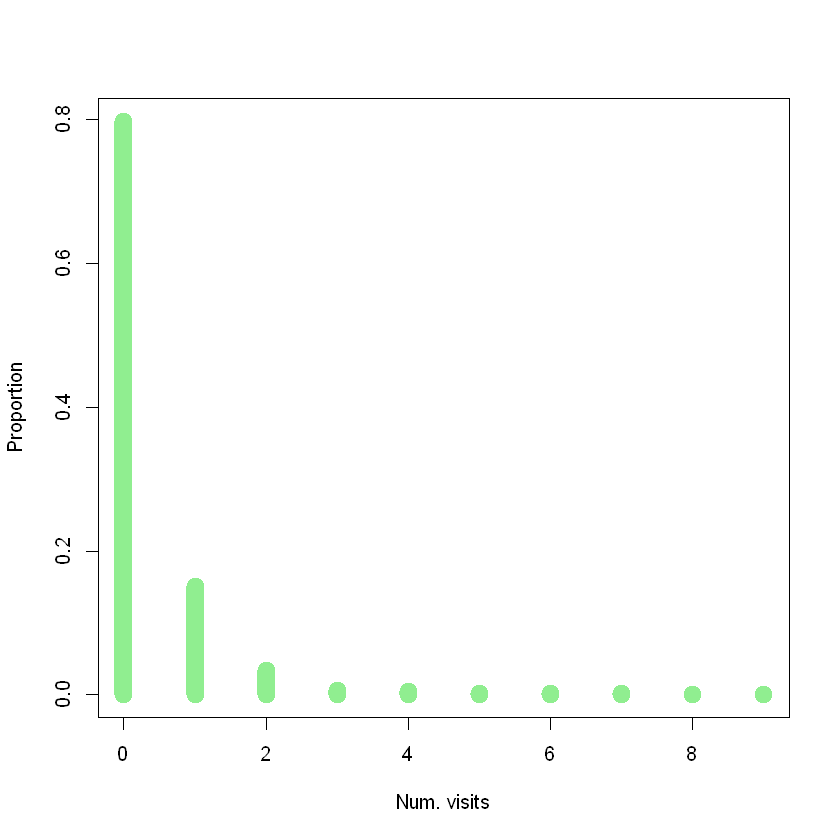

In [5]:
options(repr.plot.width=7,repr.plot.height=7)
matplot(x=0:9,y=fvisits,type="h",col="LightGreen",lwd=15,
       xlab="Num. visits", ylab="Proportion")

In [6]:
round(mean(Dvisits),3)
round(var(Dvisits),3)
round(var(Dvisits)/mean(Dvisits),3)

[1] 0.302

[1] 0.637

[1] 2.111

The variance is larger than the mean but not so large as to warrant an overdisperse classification.

The expectation and variance of  $Y\sim\negbindist(r,p)$ are:

$$
    \mskip-100mu
    \operatorname{E}(Y)=\dfrac{r\cdot (1-p)}{p},\mskip50mu\operatorname{var}(Y)=\dfrac{r\cdot (1-p)}{p^{2}}.
$$



An alternative parameterization is to use $(\mu,\theta)$ instead of $(p,r)$ where $\mu=\operatorname{E}(Y)=\dfrac{r\cdot (1-p)}{p}$  and $\theta=r$.

With this parameterization:

$$
    \mskip-100mu
    \operatorname{E}(Y)=\mu,\mskip50mu\operatorname{var}(Y)=\mu+\dfrac{\mu^{2}}{\theta}.
$$

A rough estimate of the $\theta$ parameter in a Negative Binomial is:

$$
    v\equiv\var(Y)=\mu+\dfrac{\mu^{2}}{\theta}=\mu\cdot\left(1+\dfrac{\mu}{\theta}\right),
    \mskip40mu \hat{\theta}=\dfrac{\mu}{v/\mu-1}.
$$

In this case:

In [7]:
theta.hat<-mean(Dvisits)/(var(Dvisits)/mean(Dvisits)-1)
round(theta.hat,3)

[1] 0.272

#### Predictors description

In [8]:
summary(Docvis[,1:12])

      Sex              Age             Agesq            Income      
 Min.   :0.0000   Min.   :0.1900   Min.   :0.0361   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.2200   1st Qu.:0.0484   1st Qu.:0.2500  
 Median :1.0000   Median :0.3200   Median :0.1024   Median :0.5500  
 Mean   :0.5206   Mean   :0.4064   Mean   :0.2071   Mean   :0.5832  
 3rd Qu.:1.0000   3rd Qu.:0.6200   3rd Qu.:0.3844   3rd Qu.:0.9000  
 Max.   :1.0000   Max.   :0.7200   Max.   :0.5184   Max.   :1.5000  
    Levyplus         Freepoor          Freerepa         Illness     
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :0.00000   Median :0.0000   Median :1.000  
 Mean   :0.4428   Mean   :0.04277   Mean   :0.2102   Mean   :1.432  
 3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.0000   3rd Qu.:2.000  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :5.000  
    Actdays            Hscore     

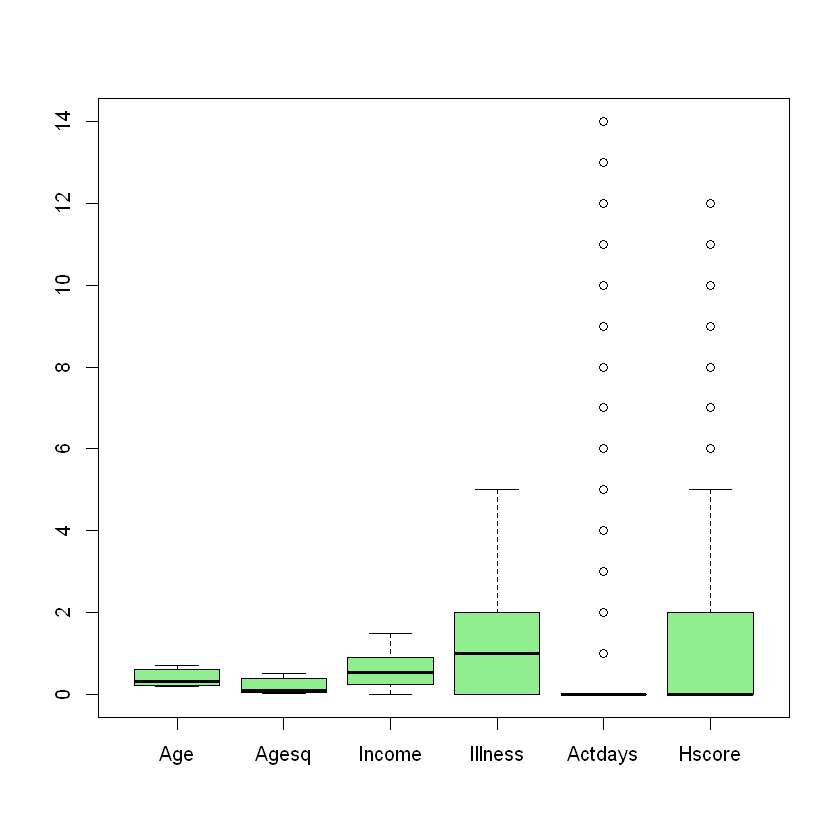

In [9]:
Num.vars<-c(2,3,4,8,9,10)
Bin.vars<-c(1,5,6,7,11,12)
options(repr.plot.width=7,repr.plot.height=7)
boxplot(Docvis[,Num.vars],col="LightGreen")

In [10]:
round(cor(Docvis[,Num.vars]),2)

,Age,Agesq,Income,Illness,Actdays,Hscore
Age,1.00,0.99,-0.27,0.20,0.09,0.02
Agesq,0.99,1.00,-0.32,0.21,0.09,0.02
Income,-0.27,-0.32,1.00,-0.15,-0.05,-0.09
Illness,0.20,0.21,-0.15,1.00,0.22,0.36
Actdays,0.09,0.09,-0.05,0.22,1.00,0.28
Hscore,0.02,0.02,-0.09,0.36,0.28,1.00


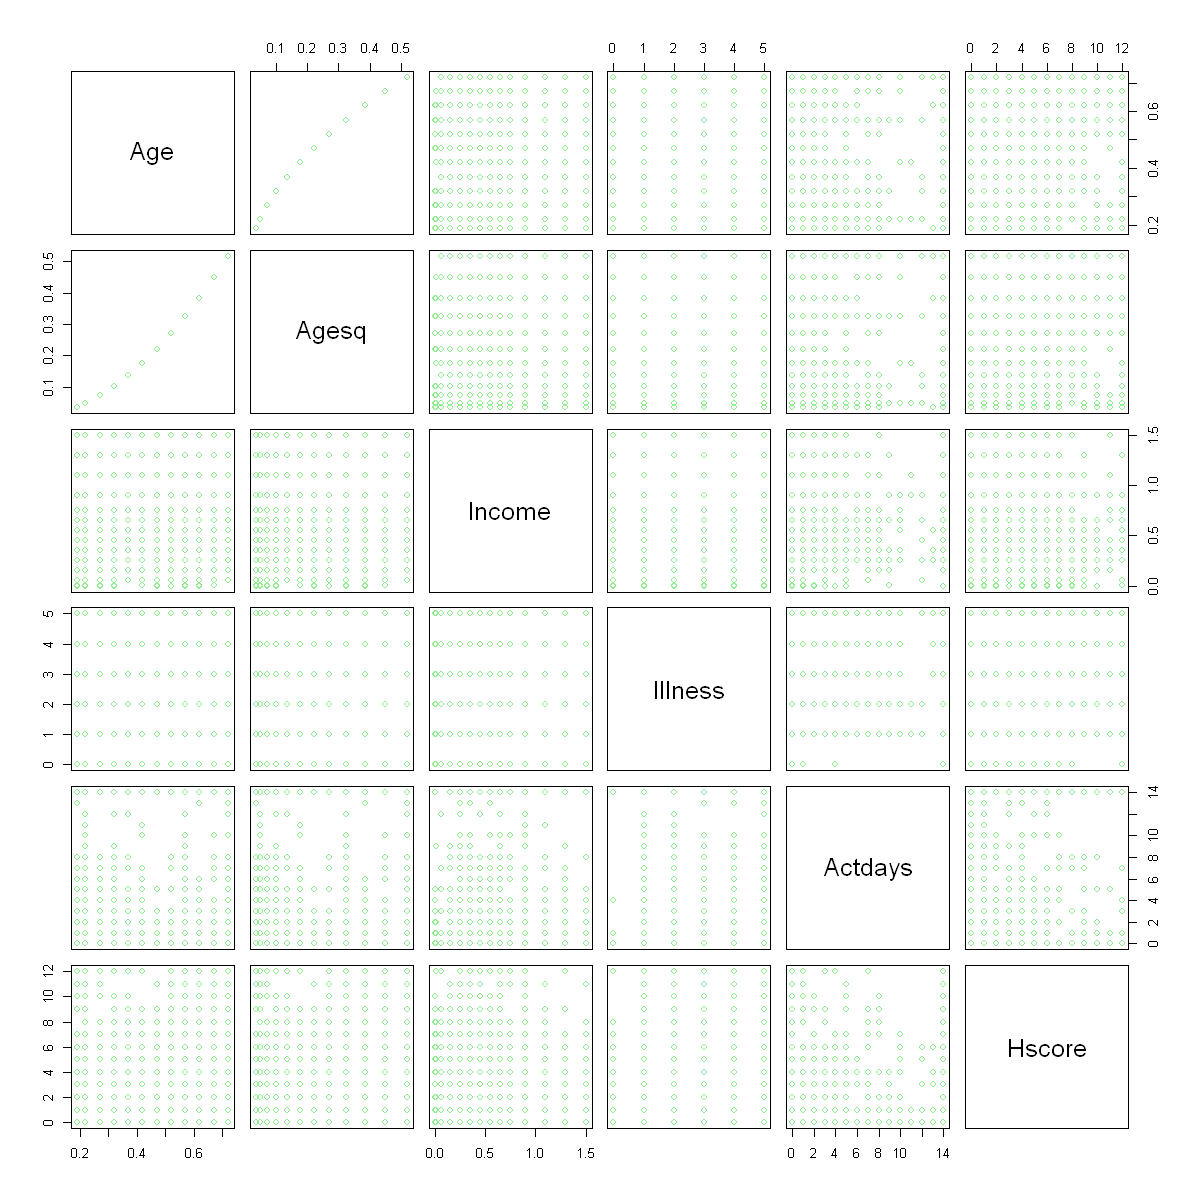

In [11]:
options(repr.plot.width=10,repr.plot.height=10)
pairs(Docvis[,Num.vars],col="LightGreen")

# 01 - Frequentist Poisson regression with `glm`

The default link function for the `poisson`  family is `log()`. That is, the model is

$$
    \log(\mu_{i})=\eta_{i},\mskip40mu \eta_{i}=\beta_{0}+x_{i}\cdot \beta,\mskip40mu 1\leq i\leq n.
$$

In [12]:
Docvis.Poisson.glm.01<-glm(Dvisits~.,family=poisson,data=Docvis)
summary(Docvis.Poisson.glm.01)


Call:
glm(formula = Dvisits ~ ., family = poisson, data = Docvis)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9170  -0.6862  -0.5743  -0.4839   5.7005  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.223848   0.189816 -11.716   <2e-16 ***
Sex          0.156882   0.056137   2.795   0.0052 ** 
Age          1.056299   1.000781   1.055   0.2912    
Agesq       -0.848704   1.077785  -0.787   0.4310    
Income      -0.205321   0.088379  -2.323   0.0202 *  
Levyplus     0.123185   0.071640   1.720   0.0855 .  
Freepoor    -0.440061   0.179811  -2.447   0.0144 *  
Freerepa     0.079798   0.092060   0.867   0.3860    
Illness      0.186948   0.018281  10.227   <2e-16 ***
Actdays      0.126846   0.005034  25.198   <2e-16 ***
Hscore       0.030081   0.010099   2.979   0.0029 ** 
Chcond1      0.114085   0.066640   1.712   0.0869 .  
Chcond2      0.141158   0.083145   1.698   0.0896 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 

### Considering overdispersion

There is a formal test of overdispersion in the `AER` package.

This is the companion of the book by Christian Kleiber and Achim Zeileis (2008), _Applied Econometrics with R._ Springer.

In [14]:
#install.packages("AER",dependencies=TRUE,repos="https://cloud.r-project.org")
require(AER)

In [15]:
dispersiontest(Docvis.Poisson.glm.01)


	Overdispersion test

data:  Docvis.Poisson.glm.01
z = 6.5428, p-value = 3.019e-11
alternative hypothesis: true dispersion is greater than 1
sample estimates:
dispersion 
  1.414427 


### `quasipoisson` family in `glm`

There is a `quasipoisson` family in `glm` to allow for some overdispersion.   
The default link is still `log()`.

The estimation procedure does not require the pdf; only the variance as a function of the mean,   
here it is $v=\mu\cdot \alpha$, where $\alpha$ has to be estimated.
On the flip side, then there is no likelihood and quantities such as `AIC` cannot be computed.

In [16]:
Docvis.Poisson.glm.02<-glm(Dvisits~.,family=quasipoisson,data=Docvis)
summary(Docvis.Poisson.glm.02)


Call:
glm(formula = Dvisits ~ ., family = quasipoisson, data = Docvis)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9170  -0.6862  -0.5743  -0.4839   5.7005  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.223848   0.218725 -10.167  < 2e-16 ***
Sex          0.156882   0.064686   2.425  0.01533 *  
Age          1.056299   1.153198   0.916  0.35972    
Agesq       -0.848704   1.241930  -0.683  0.49440    
Income      -0.205321   0.101839  -2.016  0.04384 *  
Levyplus     0.123185   0.082551   1.492  0.13570    
Freepoor    -0.440061   0.207197  -2.124  0.03373 *  
Freerepa     0.079798   0.106081   0.752  0.45194    
Illness      0.186948   0.021065   8.875  < 2e-16 ***
Actdays      0.126846   0.005801  21.868  < 2e-16 ***
Hscore       0.030081   0.011637   2.585  0.00977 ** 
Chcond1      0.114085   0.076789   1.486  0.13742    
Chcond2      0.141158   0.095808   1.473  0.14072    
---
Signif. codes:  0 '***' 0.001 '**' 0.01

# 02 - Treating overdispersion with a $\negbindist$ regression

Another possibility is to use a regression model with a $\negbindist$ response.

The `glm()` does not have this possibility, but in the `MASS` package there is a function for this model

In [17]:
require(MASS)

Loading required package: MASS



In [18]:
Docvis.NegBin.glm.01<-glm.nb(Dvisits~.,data=Docvis)
summary(Docvis.NegBin.glm.01)


Call:
glm.nb(formula = Dvisits ~ ., data = Docvis, init.theta = 0.9284725349, 
    link = log)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9711  -0.6354  -0.5277  -0.4408   4.0071  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.190007   0.233592  -9.375  < 2e-16 ***
Sex          0.216644   0.069697   3.108  0.00188 ** 
Age         -0.216158   1.266701  -0.171  0.86450    
Agesq        0.609158   1.383245   0.440  0.65966    
Income      -0.142202   0.108417  -1.312  0.18965    
Levyplus     0.118064   0.085806   1.376  0.16884    
Freepoor    -0.496611   0.210803  -2.356  0.01848 *  
Freerepa     0.144982   0.115970   1.250  0.21124    
Illness      0.214341   0.023579   9.090  < 2e-16 ***
Actdays      0.143754   0.007311  19.662  < 2e-16 ***
Hscore       0.038060   0.013654   2.788  0.00531 ** 
Chcond1      0.099355   0.079303   1.253  0.21026    
Chcond2      0.190327   0.104357   1.824  0.06818 .  
---
Signif. codes: 

In [18]:
#install.packages("COUNT",dependencies=TRUE,repos="https://cloud.r-project.org")
#require(COUNT)   
# not needed for the moment

# 03 - Bayesian Poisson regression with `MCMCpoisson`

In [19]:
#install.packages("MCMCpack",dependencies=TRUE,repos="https://cloud.r-project.org")
require(MCMCpack)

Loading required package: MCMCpack

Loading required package: coda

##
## Markov Chain Monte Carlo Package (MCMCpack)

## Copyright (C) 2003-2021 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park

##
## Support provided by the U.S. National Science Foundation

## (Grants SES-0350646 and SES-0350613)
##



In [20]:
Docvis.MCMCpoisson.01 <- MCMCpoisson(Dvisits~.,data=Docvis,burnin = 5000,mcmc = 10000)

In [21]:
summary(Docvis.MCMCpoisson.01)


Iterations = 5001:15000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                Mean       SD  Naive SE Time-series SE
(Intercept) -2.21502 0.189462 1.895e-03      0.0154081
Sex          0.15693 0.054218 5.422e-04      0.0043614
Age          0.96325 1.014773 1.015e-02      0.0841315
Agesq       -0.73415 1.102166 1.102e-02      0.0923632
Income      -0.19868 0.093607 9.361e-04      0.0081152
Levyplus     0.11833 0.069265 6.926e-04      0.0054242
Freepoor    -0.44942 0.174293 1.743e-03      0.0138121
Freerepa     0.08023 0.091175 9.117e-04      0.0073619
Illness      0.18728 0.017824 1.782e-04      0.0013426
Actdays      0.12679 0.004925 4.925e-05      0.0003790
Hscore       0.03100 0.009670 9.670e-05      0.0007896
Chcond1      0.10977 0.063191 6.319e-04      0.0051465
Chcond2      0.13501 0.084833 8.483e-04      0.0070517

2. Quantiles for each variable

In [22]:
#options(repr.plot.width=12,repr.plot.height=12)
#plot(Docvis.MCMCpoisson.01)

In [22]:
#install.packages("bayesplot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(bayesplot)

Loading required package: bayesplot

This is bayesplot version 1.8.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



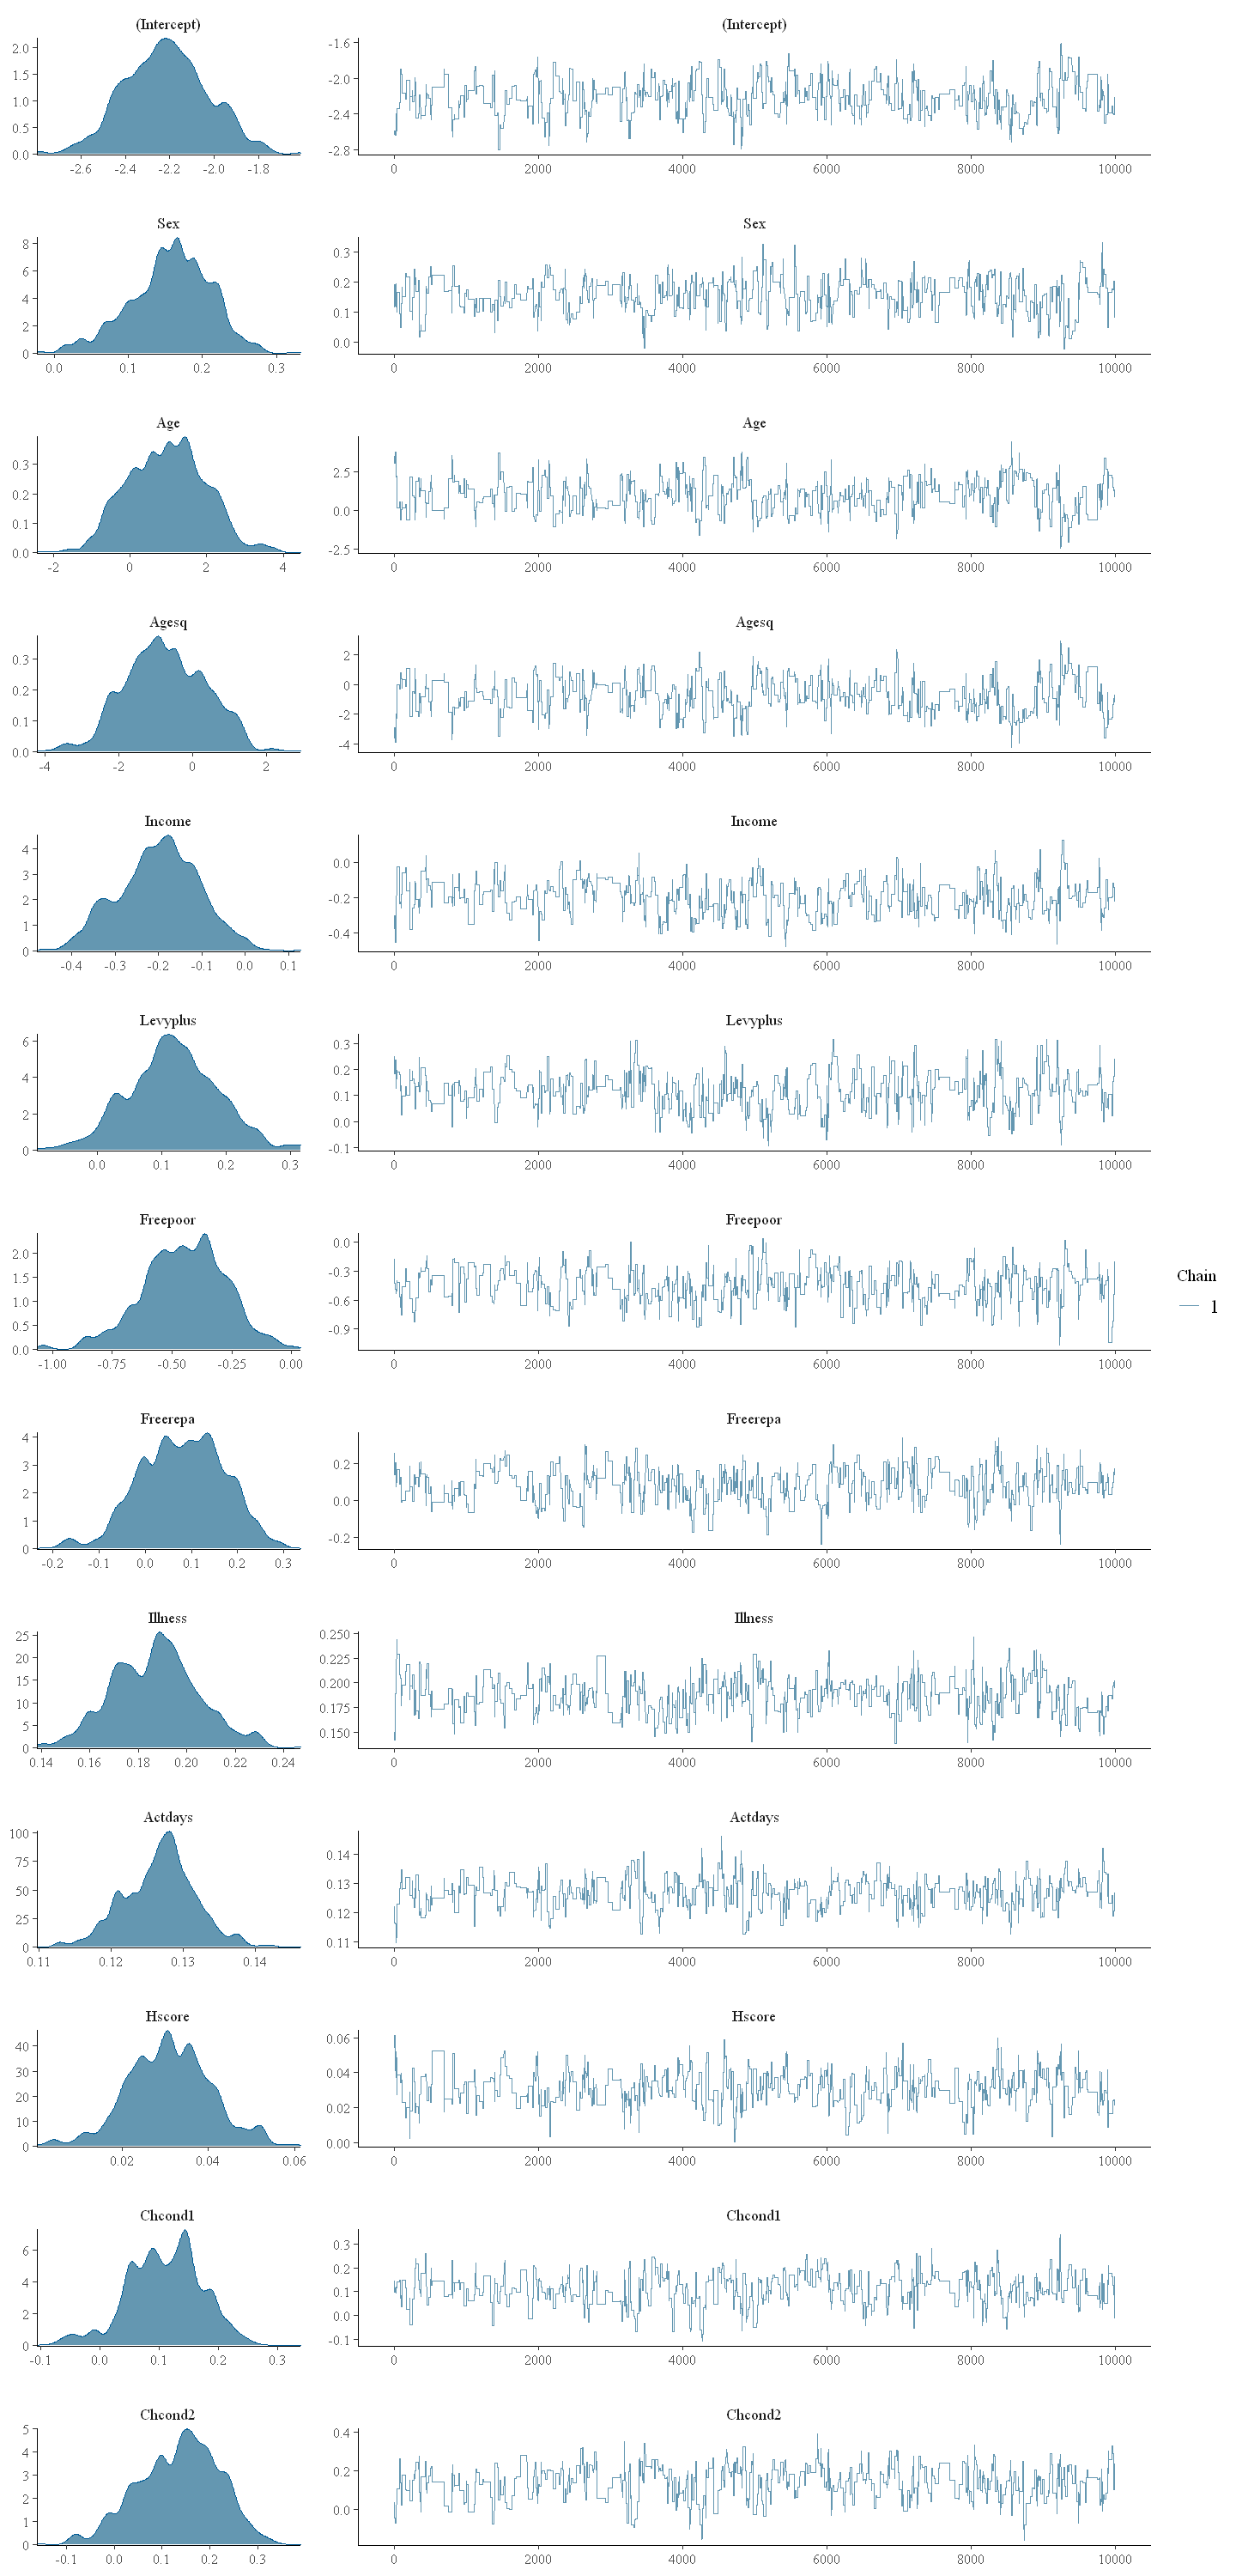

In [23]:
options(repr.plot.width=12,repr.plot.height=25)
mcmc_combo(Docvis.MCMCpoisson.01,widths=c(1,3))

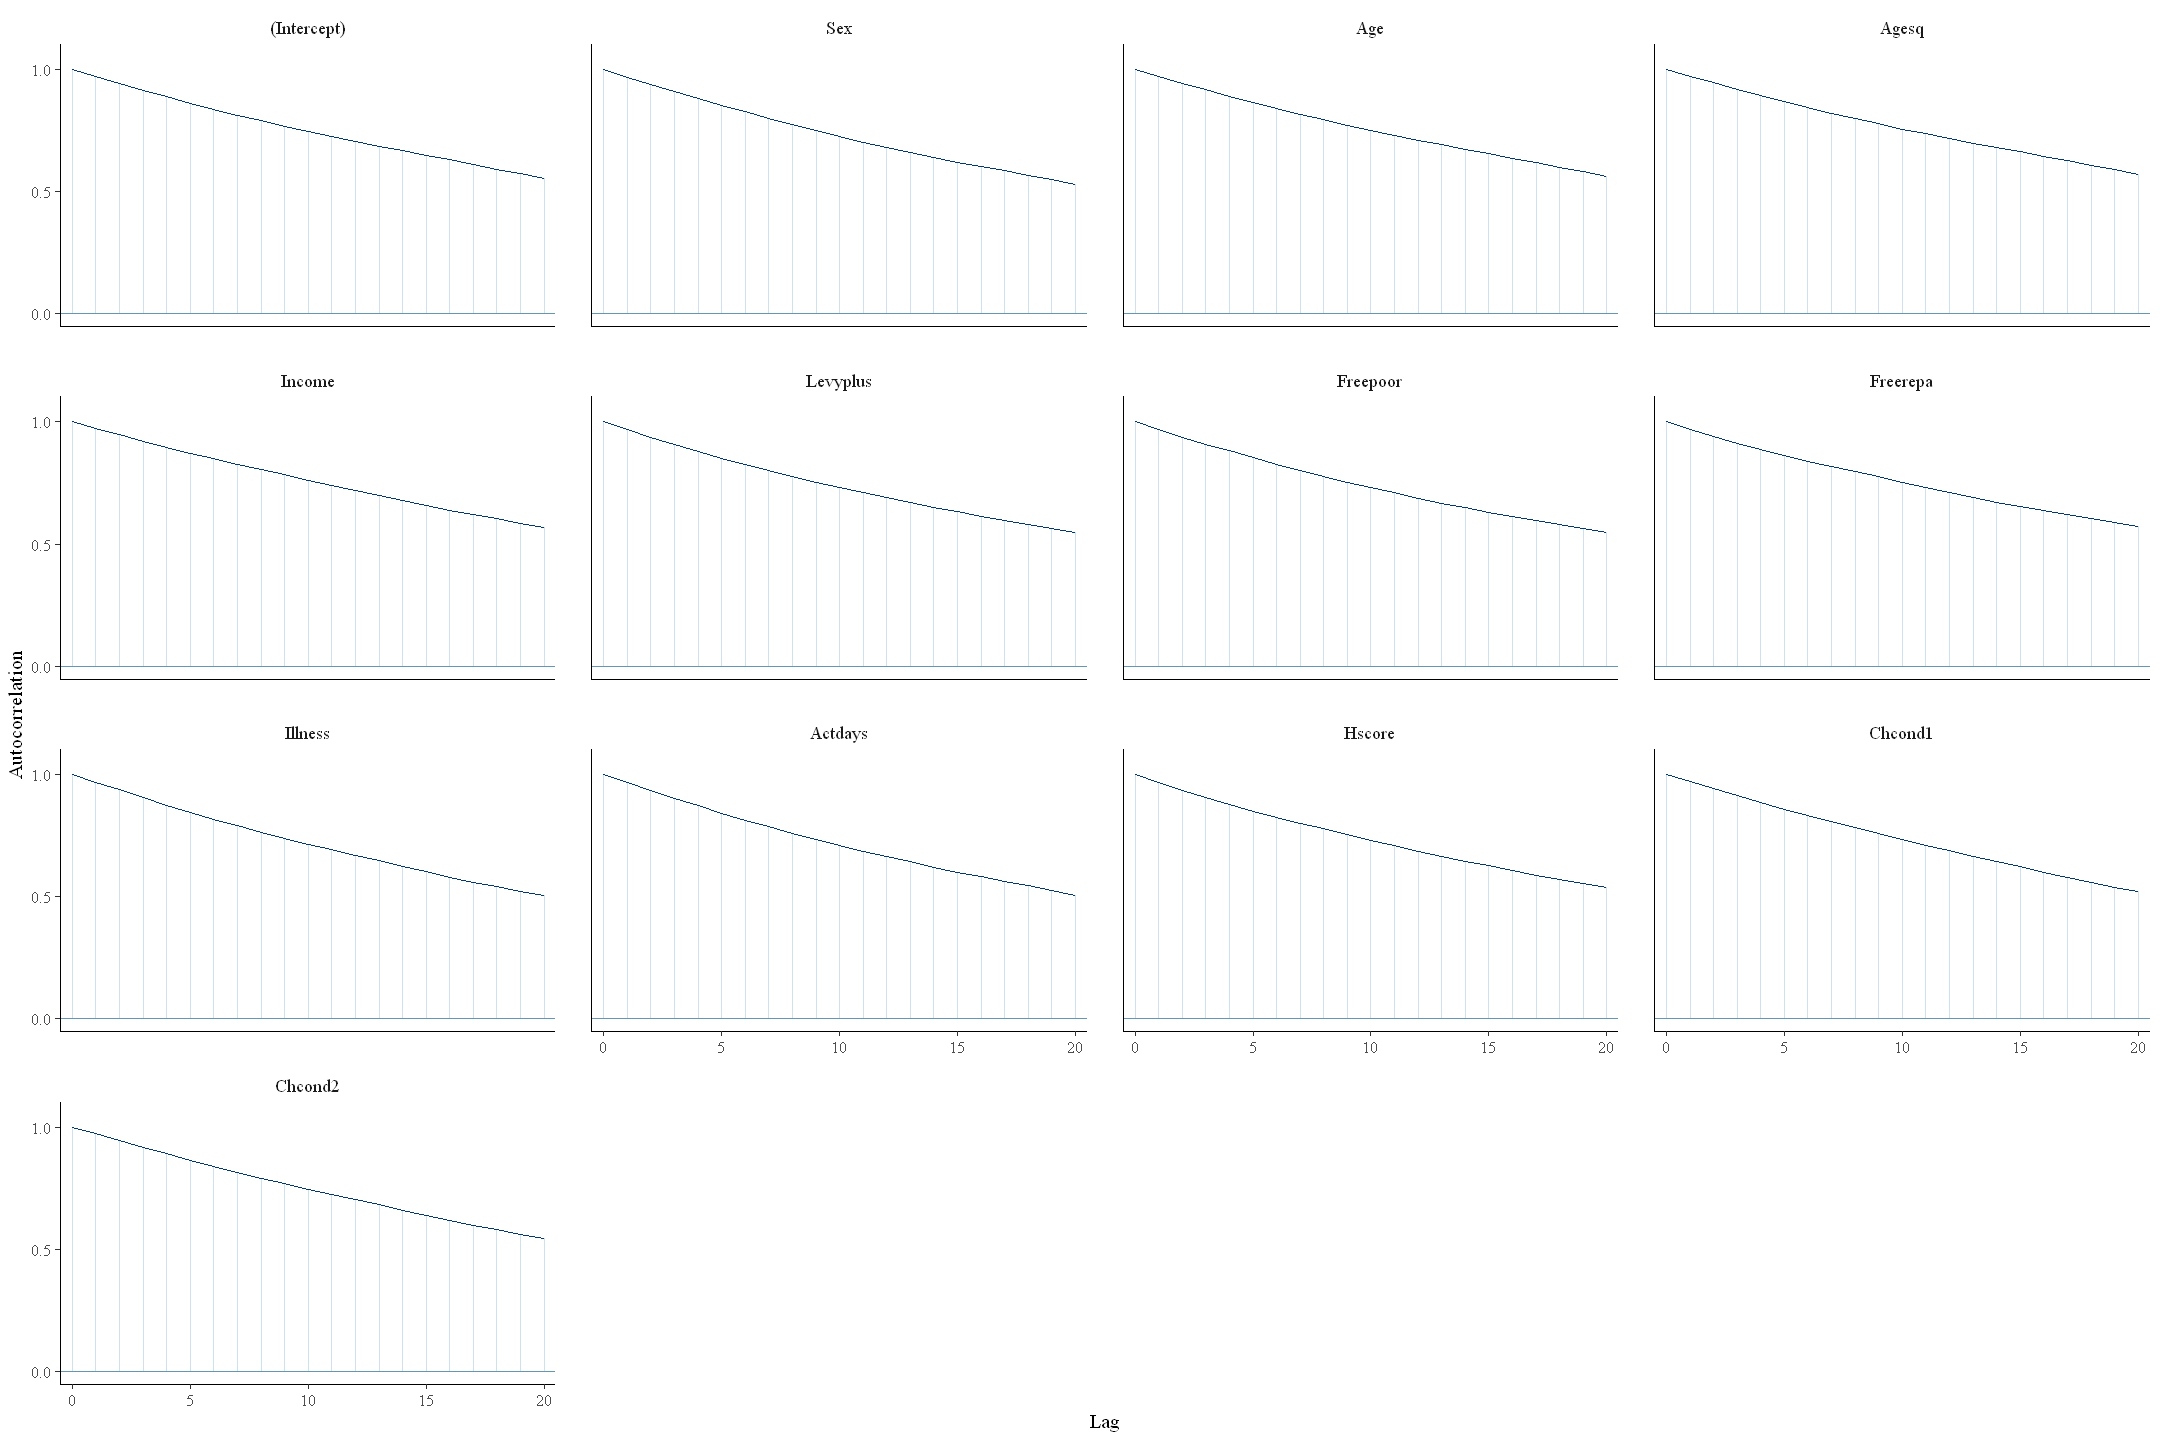

In [24]:
options(repr.plot.width=18,repr.plot.height=12)
mcmc_acf(Docvis.MCMCpoisson.01,facet_args=list(ncol=4))

# 04 - Bayesian Poisson regression with JAGS

In [25]:
#install.packages("R2jags",dependencies=TRUE,repos="https://cloud.r-project.org")
require(R2jags)

Loading required package: R2jags

Loading required package: rjags

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: 'R2jags'


The following object is masked from 'package:coda':

    traceplot




In [28]:
X <- model.matrix(Dvisits~.,data=Docvis)[,-1] # Discard the intercept column. We will enter b0
k<- ncol(X) # number of regression coefficients
n<-nrow(X)  # number of observations
str(X)
c(n,k)

 num [1:5190, 1:12] 1 1 0 0 0 1 1 1 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:5190] "1" "2" "3" "4" ...
  ..$ : chr [1:12] "Sex" "Age" "Agesq" "Income" ...


[1] 5190   12

In [29]:
Docvis.JAGS.01.data <- list(y = Docvis$Dvisits, X = X, k = k, n = n) 

In [30]:
cat("
    model{
    # prior
    b0 ~ dnorm(0, 0.001)
    for (j in 1:k){
        b[j] ~ dnorm(0, 0.0001)
        }

    # Likelihood
    for (i in 1:n){
        y[i] ~ dpois(mu[i])
        log(mu[i]) <- b0+inprod(X[i,],b[])
        }
    }",fill = TRUE, file="Docvis.JAGS.01.jag")

In [31]:
Docvis.JAGS.01.inits <- function () {list(b0 = rnorm(1, 0, 0.1), b = rnorm(k, 0, 0.1))}

In [32]:
Docvis.JAGS.01.parms <- c("b0","b")

In [33]:
Docvis.JAGS.01.model <- jags(model.file = "Docvis.JAGS.01.jag",
            data = Docvis.JAGS.01.data,
            inits = Docvis.JAGS.01.inits,
            parameters = Docvis.JAGS.01.parms,
            n.thin = 1,
            n.chains = 3,
            n.burnin = 5000,
            n.iter = 10000)

module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5190
   Unobserved stochastic nodes: 13
   Total graph size: 83653

Initializing model



In [33]:
print(Docvis.JAGS.01.model, intervals=c(0.025, 0.975), digits=3)

Inference for Bugs model at "Docvis.JAGS.01.jag", fit using jags,
 3 chains, each with 10000 iterations (first 5000 discarded)
 n.sims = 15000 iterations saved
          mu.vect sd.vect     2.5%    97.5%  Rhat n.eff
b[1]        0.177   0.057    0.061    0.287 1.043    53
b[2]        1.333   0.969   -0.454    3.283 1.005  1800
b[3]       -1.146   1.048   -3.221    0.823 1.005  4900
b[4]       -0.200   0.085   -0.373   -0.034 1.009   260
b[5]        0.088   0.069   -0.045    0.223 1.005   860
b[6]       -0.428   0.169   -0.772   -0.113 1.005   460
b[7]        0.045   0.092   -0.135    0.221 1.003  1100
b[8]        0.183   0.022    0.147    0.219 1.018   440
b[9]        0.129   0.008    0.118    0.139 1.090  5400
b[10]       0.026   0.011    0.007    0.046 1.020   370
b[11]       0.075   0.067   -0.053    0.203 1.004   720
b[12]       0.119   0.079   -0.038    0.271 1.005   490
b0         -2.212   0.222   -2.594   -1.820 1.004  1200
deviance 6735.181 151.569 6716.794 6741.770 1.029 14000


In [34]:
Docvis.JAGS.01.mcmc<-as.mcmc(Docvis.JAGS.01.model)

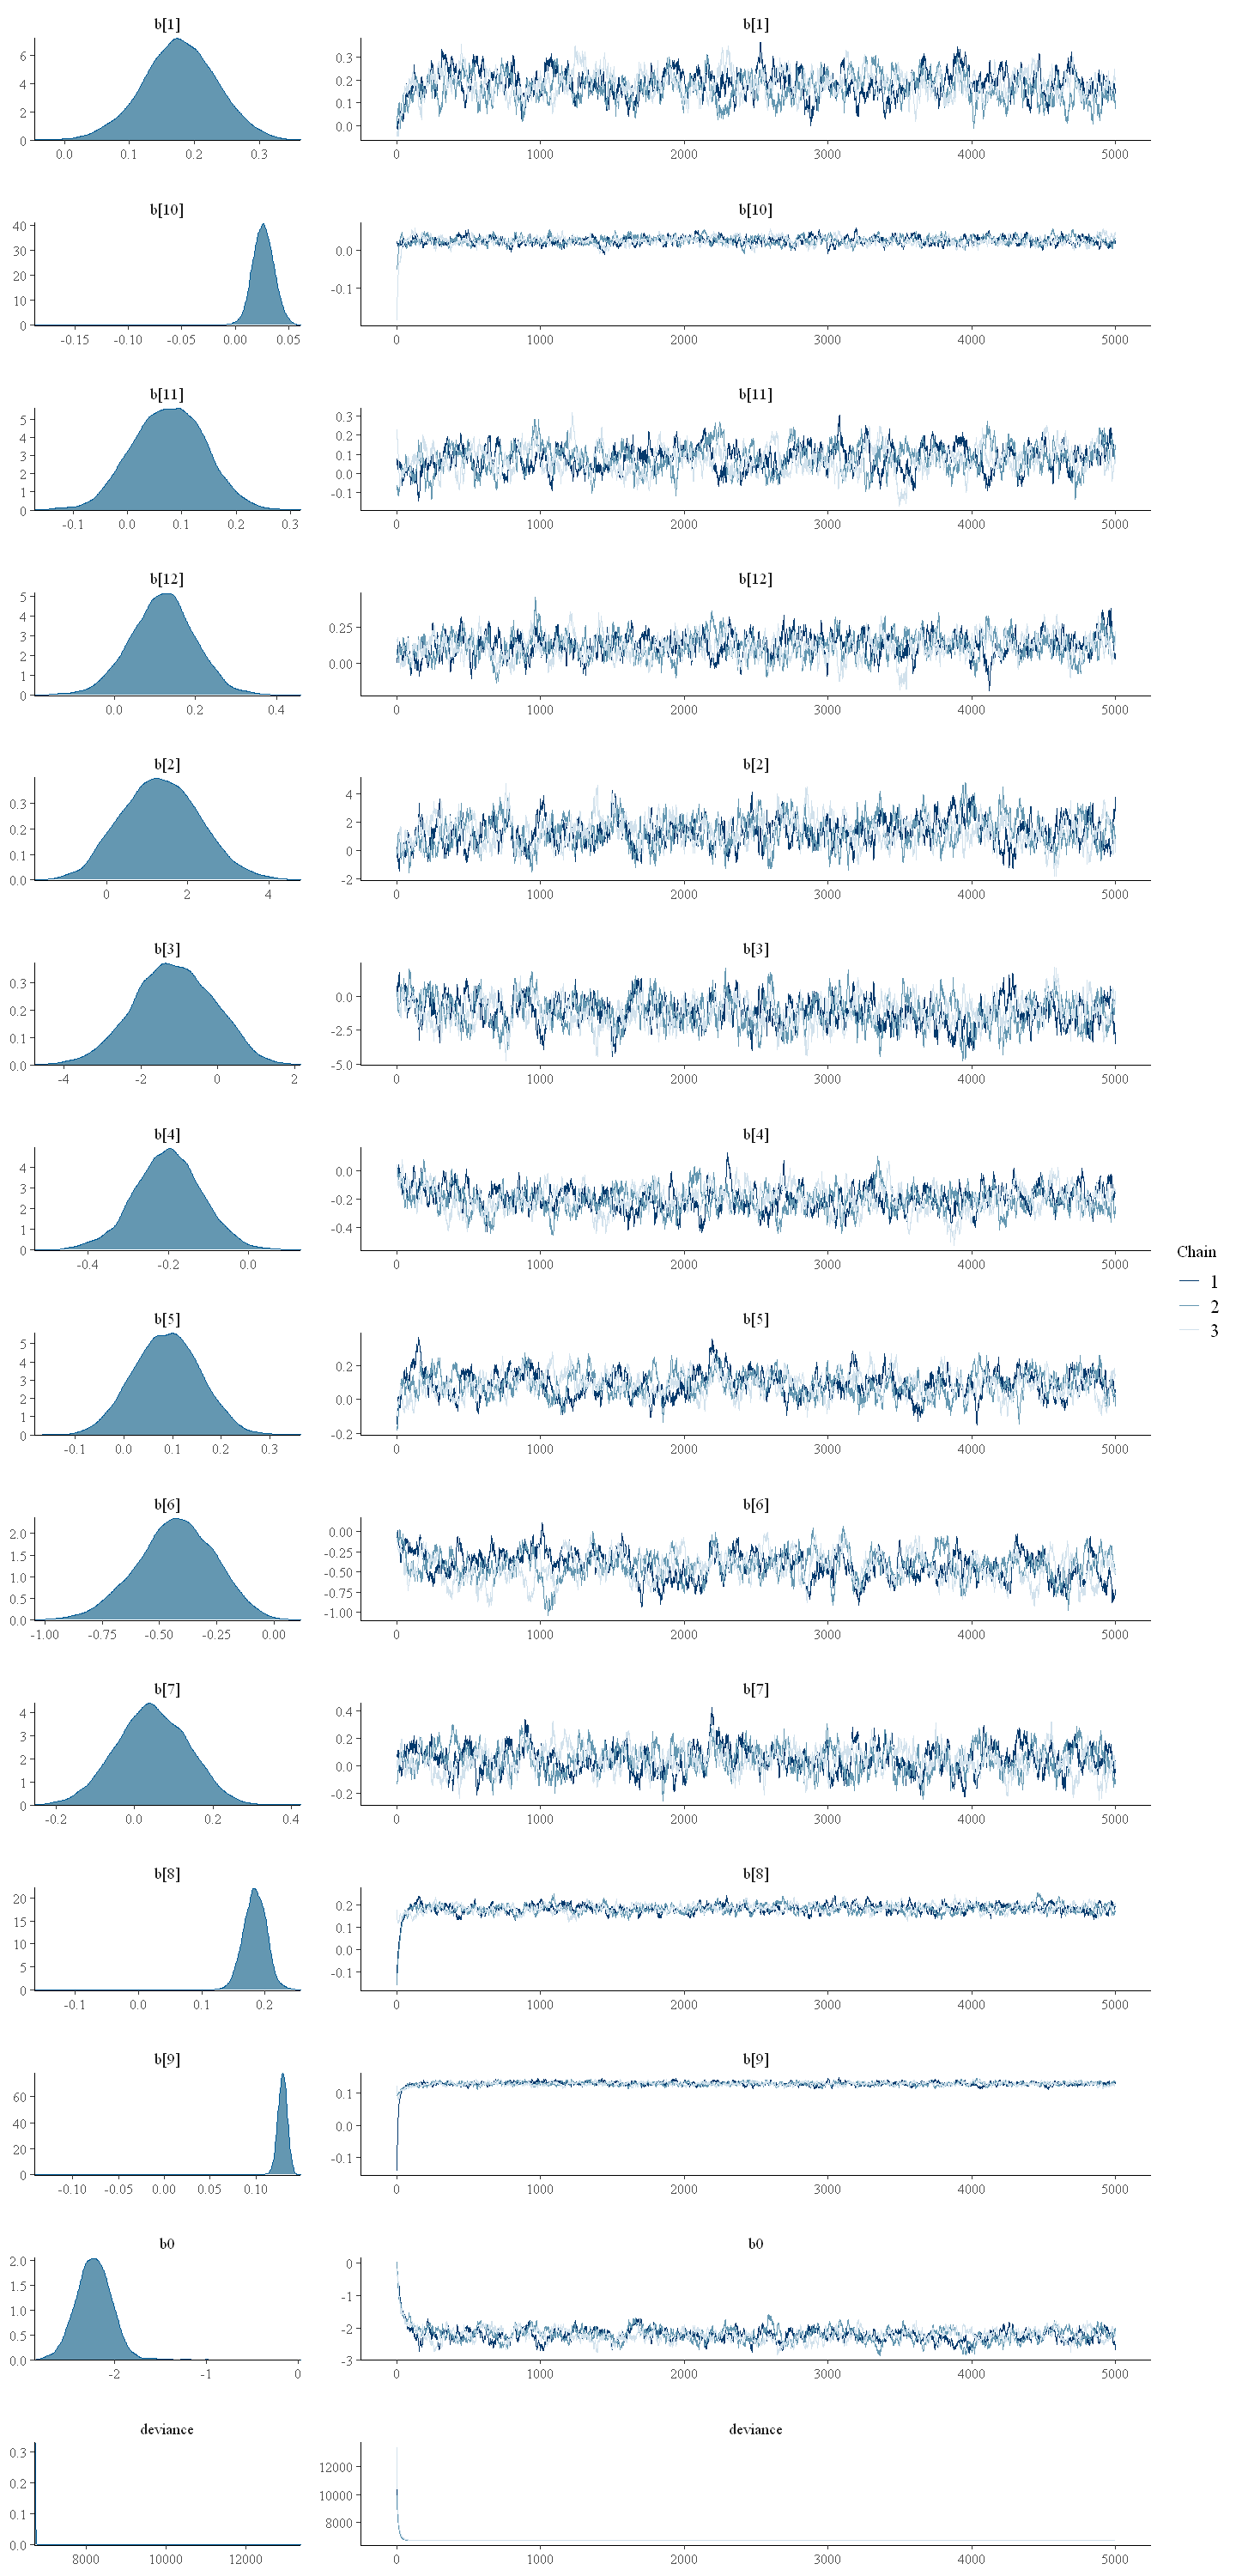

In [35]:
options(repr.plot.width=12,repr.plot.height=25)
mcmc_combo(Docvis.JAGS.01.mcmc,widths=c(1,3))

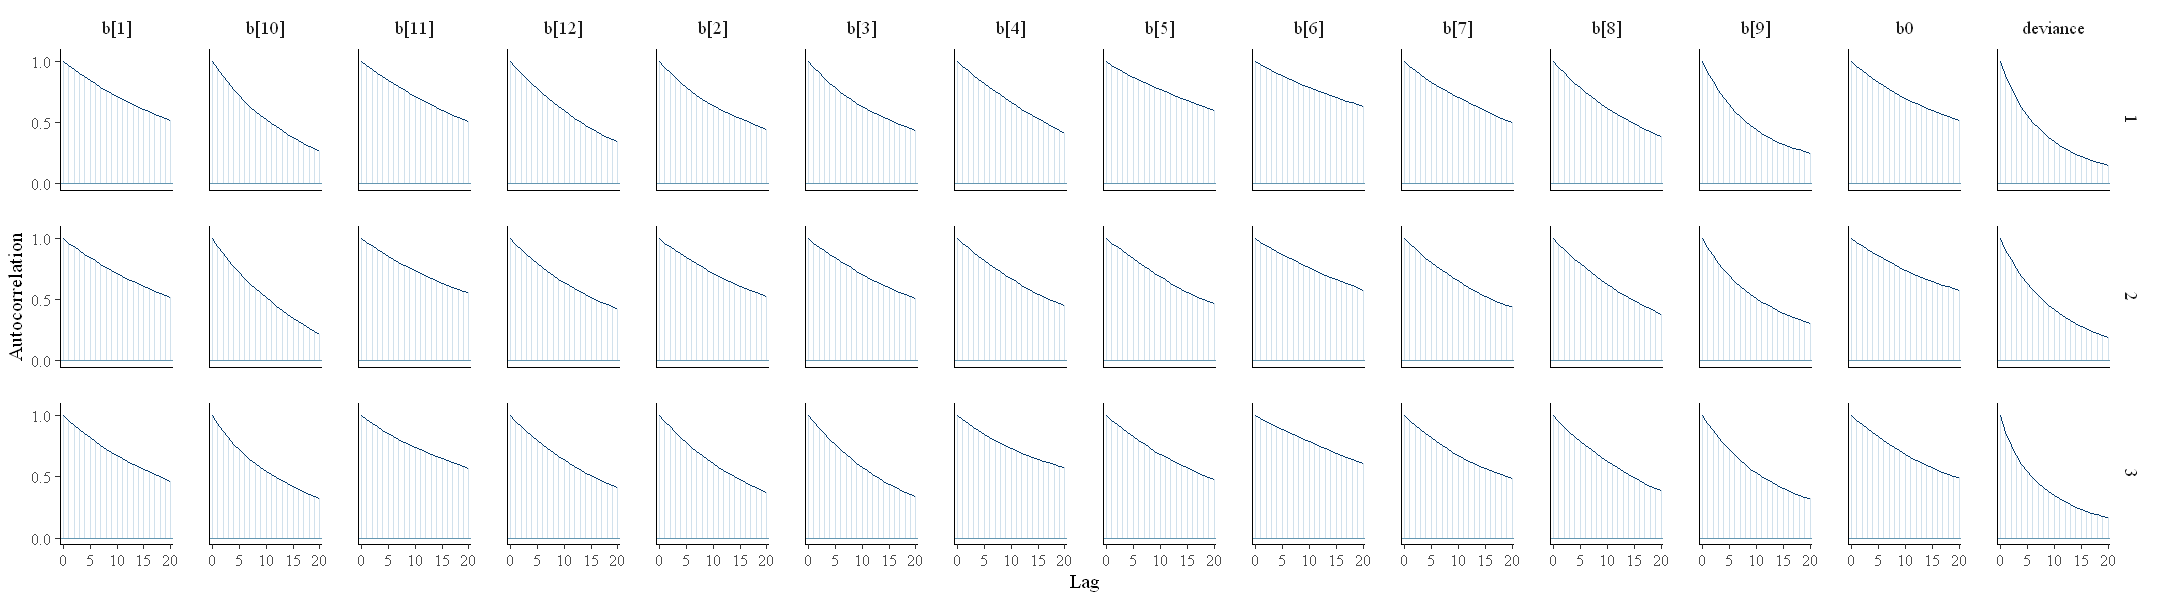

In [36]:
options(repr.plot.width=18,repr.plot.height=5)
mcmc_acf(Docvis.JAGS.01.mcmc)

# 05a - Bayesian negative binomial regression with JAGS
## With a Gamma hyperprior

In [34]:
#install.packages("R2jags",dependencies=TRUE,repos="https://cloud.r-project.org")
require(R2jags)

In [35]:
X <- model.matrix(Dvisits~.,data=Docvis)[,-1] # Discard the intercept column. We will enter b0
k<- ncol(X) # number of regression coefficients
n<-nrow(X)  # number of observations
str(X)
c(n,k)

 num [1:5190, 1:12] 1 1 0 0 0 1 1 1 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:5190] "1" "2" "3" "4" ...
  ..$ : chr [1:12] "Sex" "Age" "Agesq" "Income" ...


[1] 5190   12

In [39]:
Docvis.JAGS.NB01.data <- list(y = Docvis$Dvisits, X = X, k = k, n = n)

In [40]:
cat("
    model{
    # Prior for dispersion parameter
    theta ~ dunif(0.001, 5)

    # Priors for coefficients
    b0 ~ dnorm(0, 0.001)
    for (j in 1:k) {
        b[j] ~ dnorm(0, 0.0001)
        }

    # Likelihood function: NegBin is modelled as a Poisson with a Gamma prior
    # The alpha parameter (shape) in the Gamma prior is the intended theta
    # The beta parameter (rate) is a function of both theta and mu[i] (the i-th expectation)
    # In turn, mu[i] is equated to the exp of the linear predictor eta[i]

    for (i in 1:n){
        y[i] ~ dpois(g[i])
        g[i] ~ dgamma(theta, rateParm[i])
        rateParm[i] <- theta / mu[i]
        log(mu[i]) <- eta[i]
        eta[i] <- b0 + inprod(b[], X[i,])
        }
    }
    ",fill = TRUE,file="Docvis.JAGS.NB01.jag")

In [41]:
Docvis.JAGS.NB01.inits <- function () {list(b0 = rnorm(1, 0, 0.1), b = rnorm(k, 0, 0.1), theta = runif(0.00, 5))}

In [42]:
Docvis.JAGS.NB01.parms <- c("b0", "b", "theta")

### Quite LOOONG computation - (But with smaller `n.iter` precision is poor)

In [43]:
Docvis.JAGS.NB01.model <- jags(data = Docvis.JAGS.NB01.data,
            inits = Docvis.JAGS.NB01.inits,
            parameters = Docvis.JAGS.NB01.parms,
            model = "Docvis.JAGS.NB01.jag",
            n.thin = 1,
            n.chains = 3,
            n.burnin = 3000,
            n.iter = 6000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5190
   Unobserved stochastic nodes: 5204
   Total graph size: 92503

Initializing model



In [44]:
print(Docvis.JAGS.NB01.model, intervals=c(0.025, 0.975), digits=3)

Inference for Bugs model at "Docvis.JAGS.NB01.jag", fit using jags,
 3 chains, each with 6000 iterations (first 3000 discarded)
 n.sims = 9000 iterations saved
          mu.vect sd.vect     2.5%    97.5%  Rhat n.eff
b[1]        0.218   0.065    0.090    0.346 1.011   230
b[2]       -0.523   1.744   -3.525    1.907 2.866     4
b[3]        0.947   1.905   -1.740    4.212 2.846     4
b[4]       -0.145   0.110   -0.361    0.051 1.131    20
b[5]        0.123   0.087   -0.051    0.299 1.007  1100
b[6]       -0.503   0.206   -0.903   -0.110 1.006  1500
b[7]        0.146   0.115   -0.080    0.367 1.003   790
b[8]        0.214   0.024    0.167    0.260 1.020   110
b[9]        0.144   0.008    0.129    0.160 1.006   360
b[10]       0.038   0.014    0.011    0.065 1.022   110
b[11]       0.101   0.076   -0.042    0.255 1.019   120
b[12]       0.196   0.101    0.005    0.398 1.059    39
b0         -2.141   0.299   -2.618   -1.589 2.445     4
theta       0.925   0.091    0.760    1.116 1.028    76


In [45]:
Docvis.JAGS.NB01.mcmc<-as.mcmc(Docvis.JAGS.NB01.model)

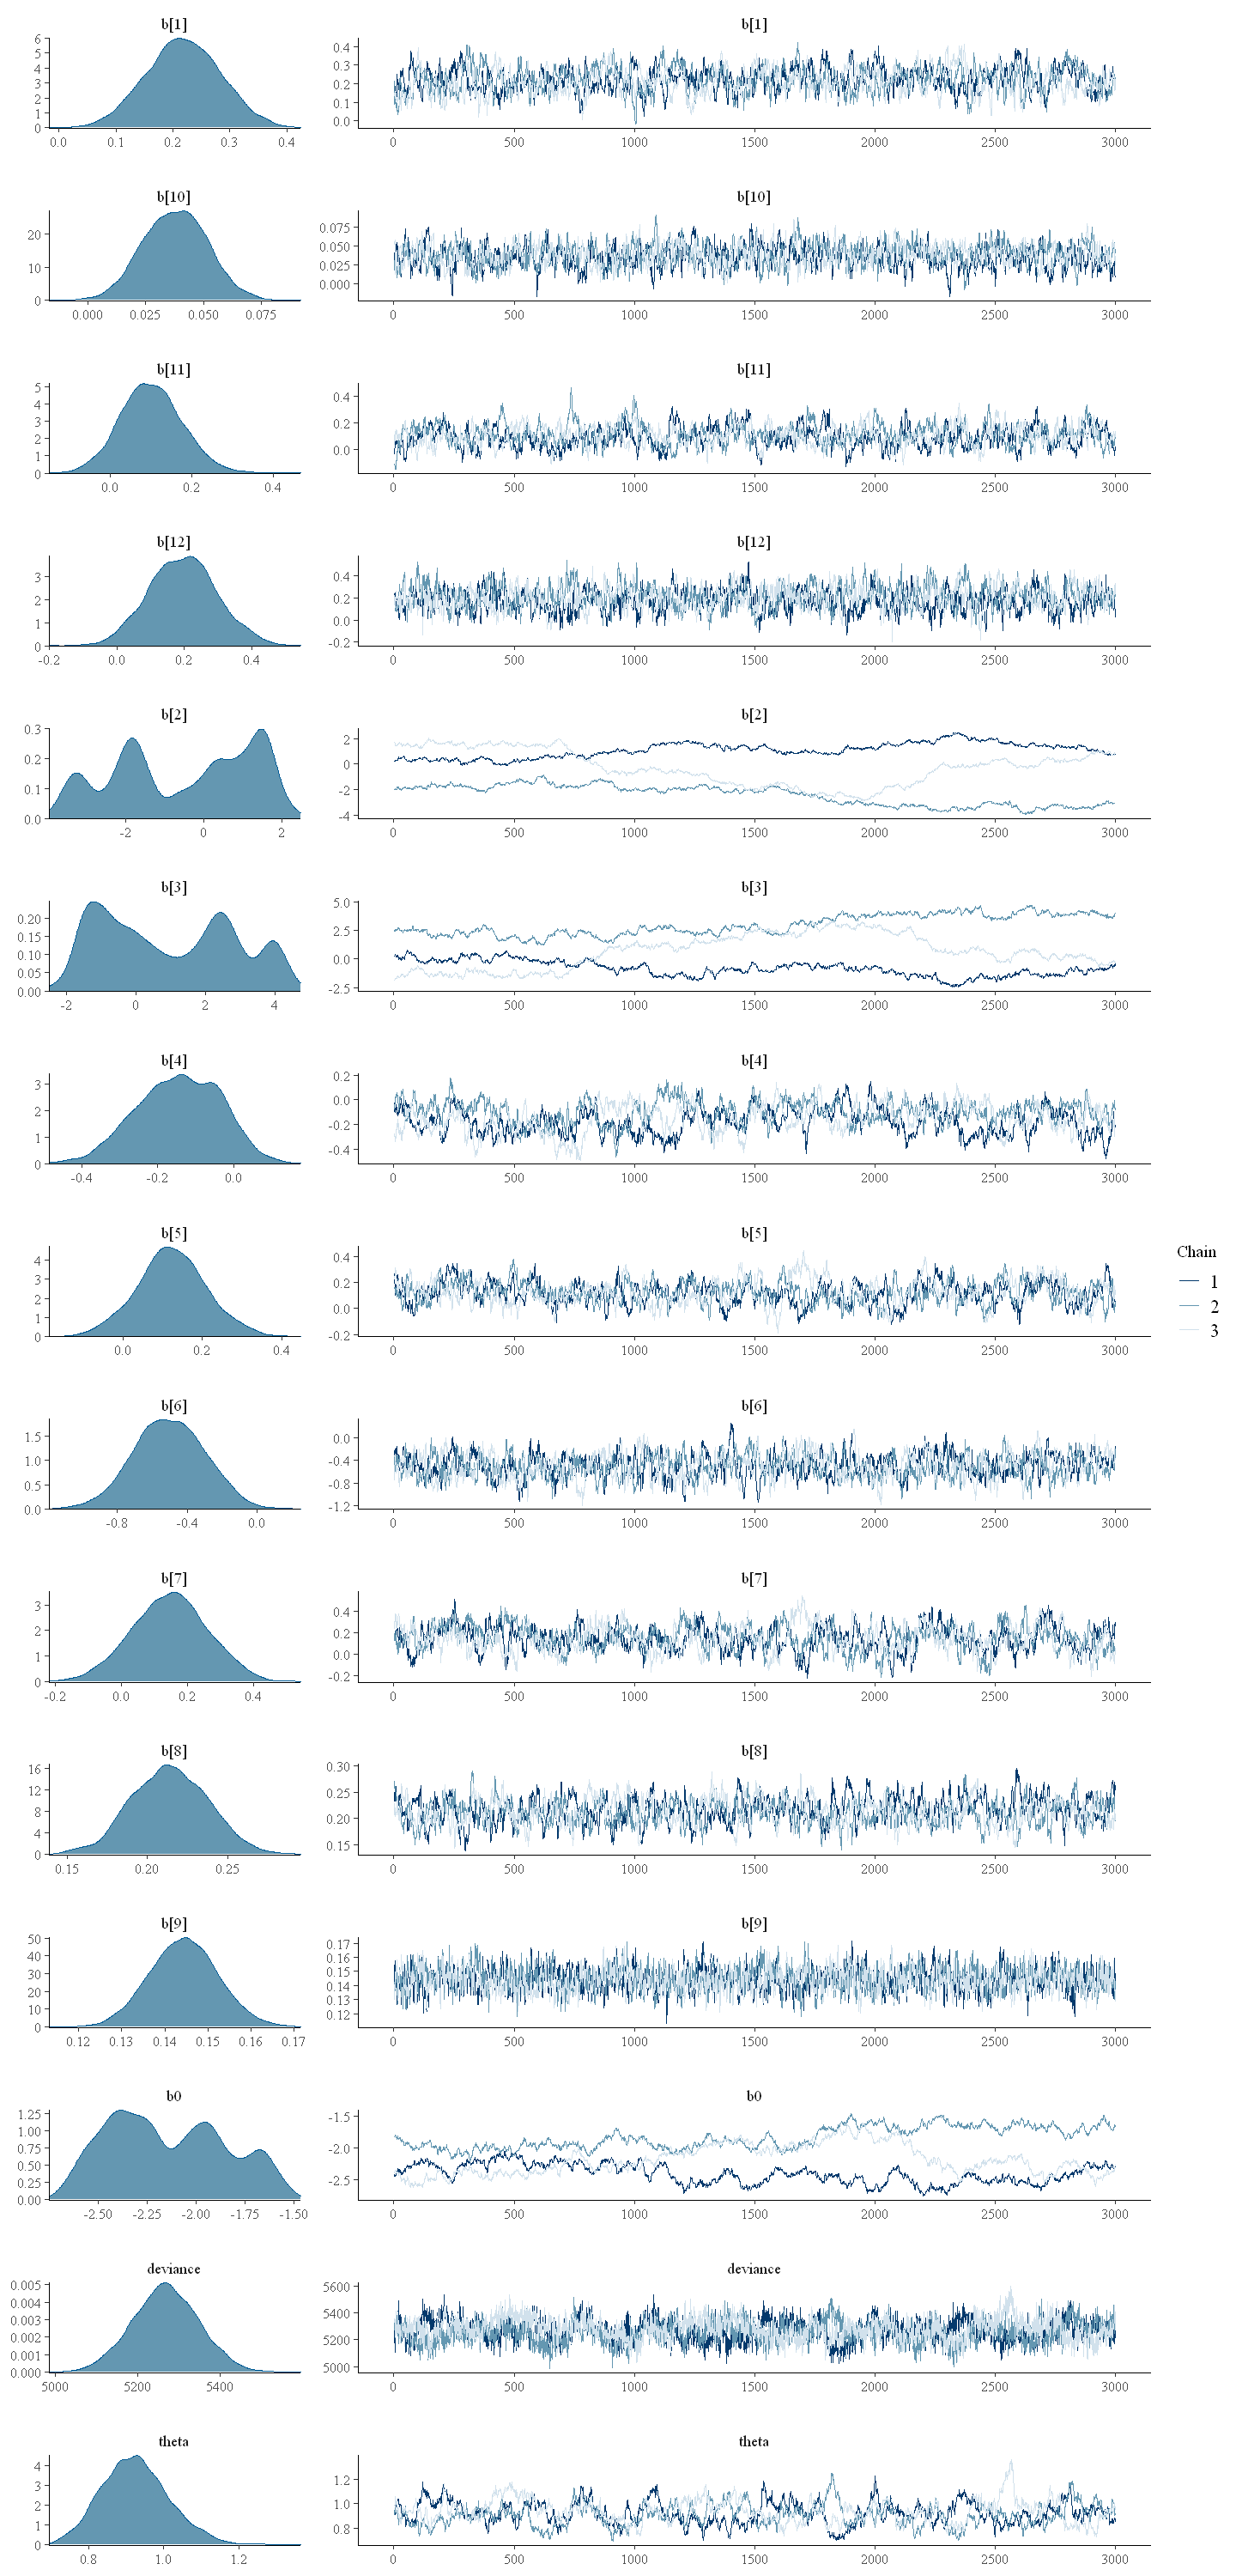

In [46]:
options(repr.plot.width=12,repr.plot.height=25)
mcmc_combo(Docvis.JAGS.NB01.mcmc,widths=c(1,3))

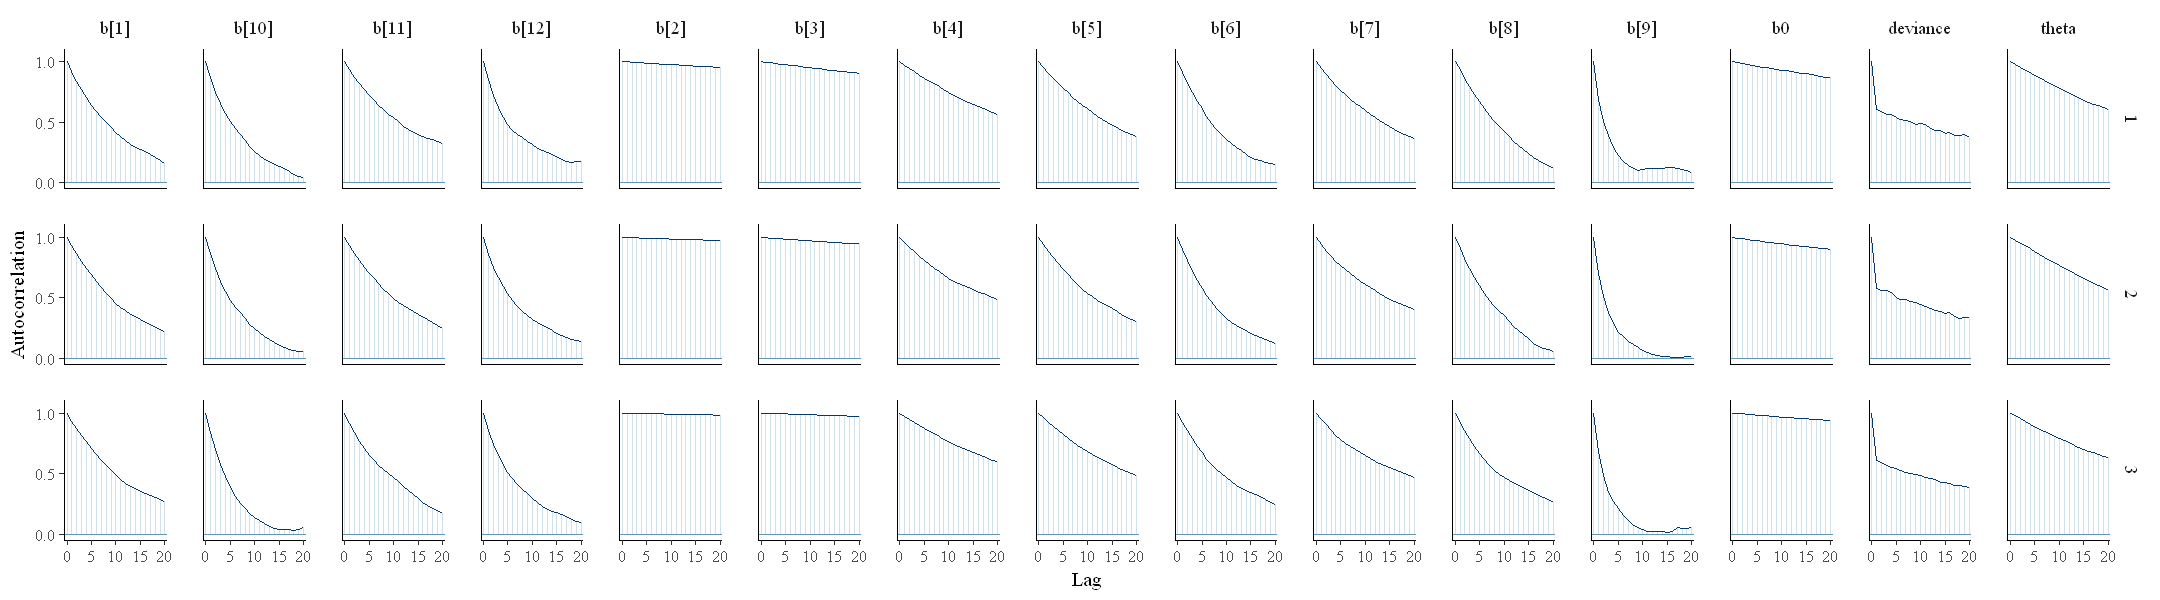

In [47]:
options(repr.plot.width=18,repr.plot.height=5)
mcmc_acf(Docvis.JAGS.NB01.mcmc)

# 05b - Bayesian negative binomial regression with JAGS 
## Gamma hyperprior, different parameterization

$\phi=1/\theta$ instead of $\theta$.

In [ ]:
#install.packages("R2jags",dependencies=TRUE,repos="https://cloud.r-project.org")
require(R2jags)

In [ ]:
X <- model.matrix(Dvisits~.,data=Docvis)[,-1] # Discard the intercept column. We will enter b0
k<- ncol(X) # number of regression coefficients
n<-nrow(X)  # number of observations
str(X)
c(n,k)

In [ ]:
Docvis.JAGS.NB02.data <- list(y = Docvis$Dvisits, X = X, k = k, n = n)

In [ ]:
cat("
    model{
    # Priors
    phi ~ dunif(0.001, 5)

    # Priors for coefficients
    
    b0 ~ dnorm(0, 0.001)
    for (j in 1:k){
        beta[j] ~ dnorm(0, 0.0001)
        }

    # Likelihood function
    for (i in 1:n){
        y[i] ~ dpois(g[i])
        g[i] ~ dgamma(1/phi, rateParm[i])
        rateParm[i] <- (1/phi) / mu[i]
        log(mu[i]) <- eta[i]
        eta[i] <- b0 + inprod(b[], X[i,])
        }
    }
    ",fill = TRUE,file="Docvis.JAGS.NB02.jag")

In [ ]:
Docvis.JAGS.NB02.inits <- function () {list(b0 = rnorm(1, 0, 0.1), b = rnorm(k, 0, 0.1), phi = runif(0.00, 5))}

In [ ]:
Docvis.JAGS.NB02.parms <- c("b0", "b", "phi")

### Quite LOOONG computation - (But with smaller `n.iter` precision is poor)

In [ ]:
Docvis.JAGS.NB02.model <- jags(data = Docvis.JAGS.NB02.data,
            inits = Docvis.JAGS.NB02.inits,
            parameters = Docvis.JAGS.NB02.parms,
            model = "Docvis.JAGS.NB02.jag",
            n.thin = 1,
            n.chains = 3,
            n.burnin = 3000,
            n.iter = 10000)

In [ ]:
print(Docvis.JAGS.NB02.model, intervals=c(0.025, 0.975), digits=3)

# 05c - Bayesian negative binomial regression with JAGS 
## Using the JAGS `dnegbin` function instead of the Gamma hyperprior

According to Hilbe et al. (2017) JAGS is using the Gamma prior internally.

$\bullet\mskip10mu$ In JAGS, `dnegbin` has parameters:

$$
    p=\dfrac{\beta}{\beta+1}=\dfrac{1/\phi\cdot\mu}{1/\phi\cdot\mu+1}=\dfrac{1}{\phi\cdot\mu+1}, \mskip40mu
    r=\alpha=1/\phi.
$$

In [48]:
#install.packages("R2jags",dependencies=TRUE,repos="https://cloud.r-project.org")
require(R2jags)

In [49]:
X <- model.matrix(Dvisits~.,data=Docvis)[,-1] # Discard the intercept column. We will enter b0
k<- ncol(X) # number of regression coefficients
n<-nrow(X)  # number of observations
str(X)
c(n,k)

 num [1:5190, 1:12] 1 1 0 0 0 1 1 1 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:5190] "1" "2" "3" "4" ...
  ..$ : chr [1:12] "Sex" "Age" "Agesq" "Income" ...


[1] 5190   12

In [50]:
Docvis.JAGS.NB03.data <- list(y = Docvis$Dvisits, X = X, k = k, n = n)

In [55]:
cat("
model{
    # Prior for phi
    phi ~ dunif(0.001, 5)

    # Priors for coefficients

    b0 ~ dnorm(0, 0.001)
    for (j in 1:k){
        b[j] ~ dnorm(0, 0.0001)
        }

    # Likelihood 
    for (i in 1:n){
        y[i] ~ dnegbin(p[i], 1/phi)        # for indirect, (p[i], phi)
        p[i] <- 1/(1 + phi*mu[i])
        log(mu[i]) <- eta[i]
        eta[i] <- b0 + inprod(b[], X[i,])
    }
}
",fill = TRUE,file="Docvis.JAGS.NB03.jag")

In [56]:
Docvis.JAGS.NB03.inits <- function () {list(b0 = rnorm(1, 0, 0.1), b = rnorm(k, 0, 0.1), phi = runif(0.00, 5))}

In [57]:
Docvis.JAGS.NB03.parms <- c("b0", "b", "phi")

### Quite LOOONG computation - (But with smaller `n.iter` precision is poor)

In [58]:
Docvis.JAGS.NB03.model <- jags(data = Docvis.JAGS.NB03.data,
            inits = Docvis.JAGS.NB03.inits,
            parameters = Docvis.JAGS.NB03.parms,
            model = "Docvis.JAGS.NB03.jag",
            n.thin = 1,
            n.chains = 3,
            n.burnin = 3000,
            n.iter = 10000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5190
   Unobserved stochastic nodes: 14
   Total graph size: 94631

Initializing model



In [59]:
print(Docvis.JAGS.NB03.model, intervals=c(0.025, 0.975), digits=3)

Inference for Bugs model at "Docvis.JAGS.NB03.jag", fit using jags,
 3 chains, each with 10000 iterations (first 3000 discarded)
 n.sims = 21000 iterations saved
          mu.vect sd.vect     2.5%    97.5%  Rhat n.eff
b[1]        0.218   0.069    0.083    0.353 1.001  4800
b[2]        0.064   1.207   -2.352    2.161 1.147    18
b[3]        0.308   1.327   -2.036    2.960 1.146    18
b[4]       -0.149   0.107   -0.358    0.060 1.007   330
b[5]        0.116   0.085   -0.052    0.284 1.002  2300
b[6]       -0.507   0.208   -0.919   -0.102 1.001 21000
b[7]        0.144   0.117   -0.084    0.375 1.001  7400
b[8]        0.215   0.025    0.166    0.262 1.001  4800
b[9]        0.144   0.008    0.129    0.160 1.001 12000
b[10]       0.038   0.014    0.010    0.065 1.001  5300
b[11]       0.098   0.078   -0.056    0.251 1.003  1000
b[12]       0.187   0.103   -0.012    0.392 1.005   450
b0         -2.241   0.224   -2.666   -1.785 1.106    24
phi         1.106   0.105    0.908    1.323 1.001  640

In [60]:
Docvis.JAGS.NB03.mcmc<-as.mcmc(Docvis.JAGS.NB03.model)

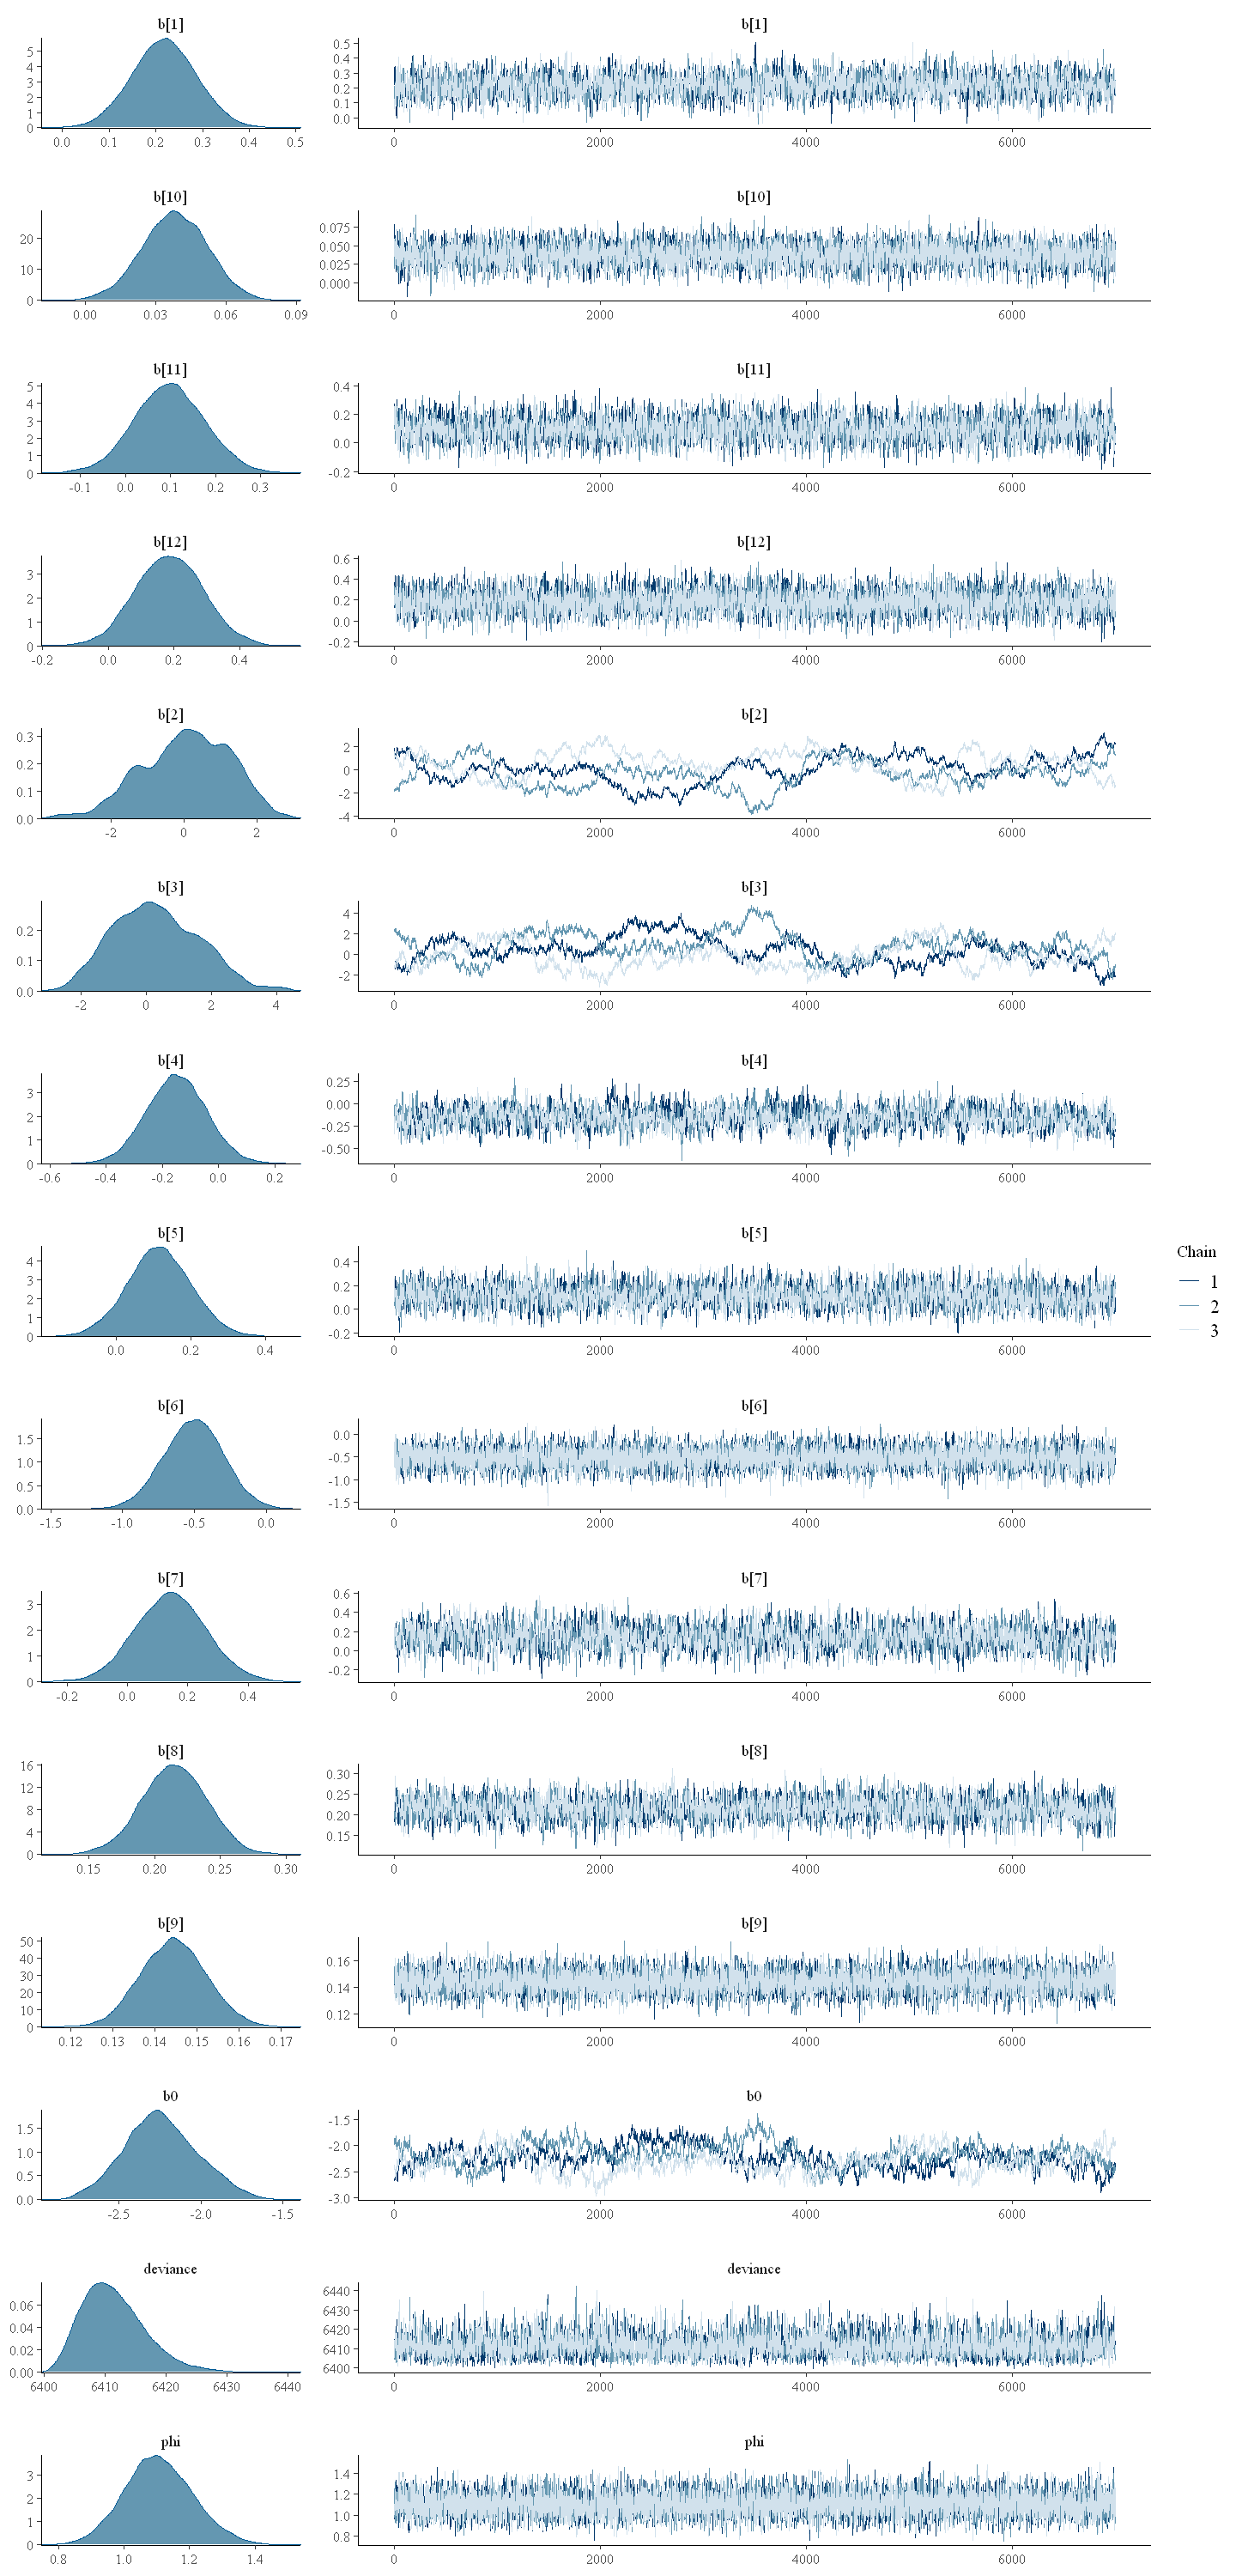

In [61]:
options(repr.plot.width=12,repr.plot.height=25)
mcmc_combo(Docvis.JAGS.NB03.mcmc,widths=c(1,3))

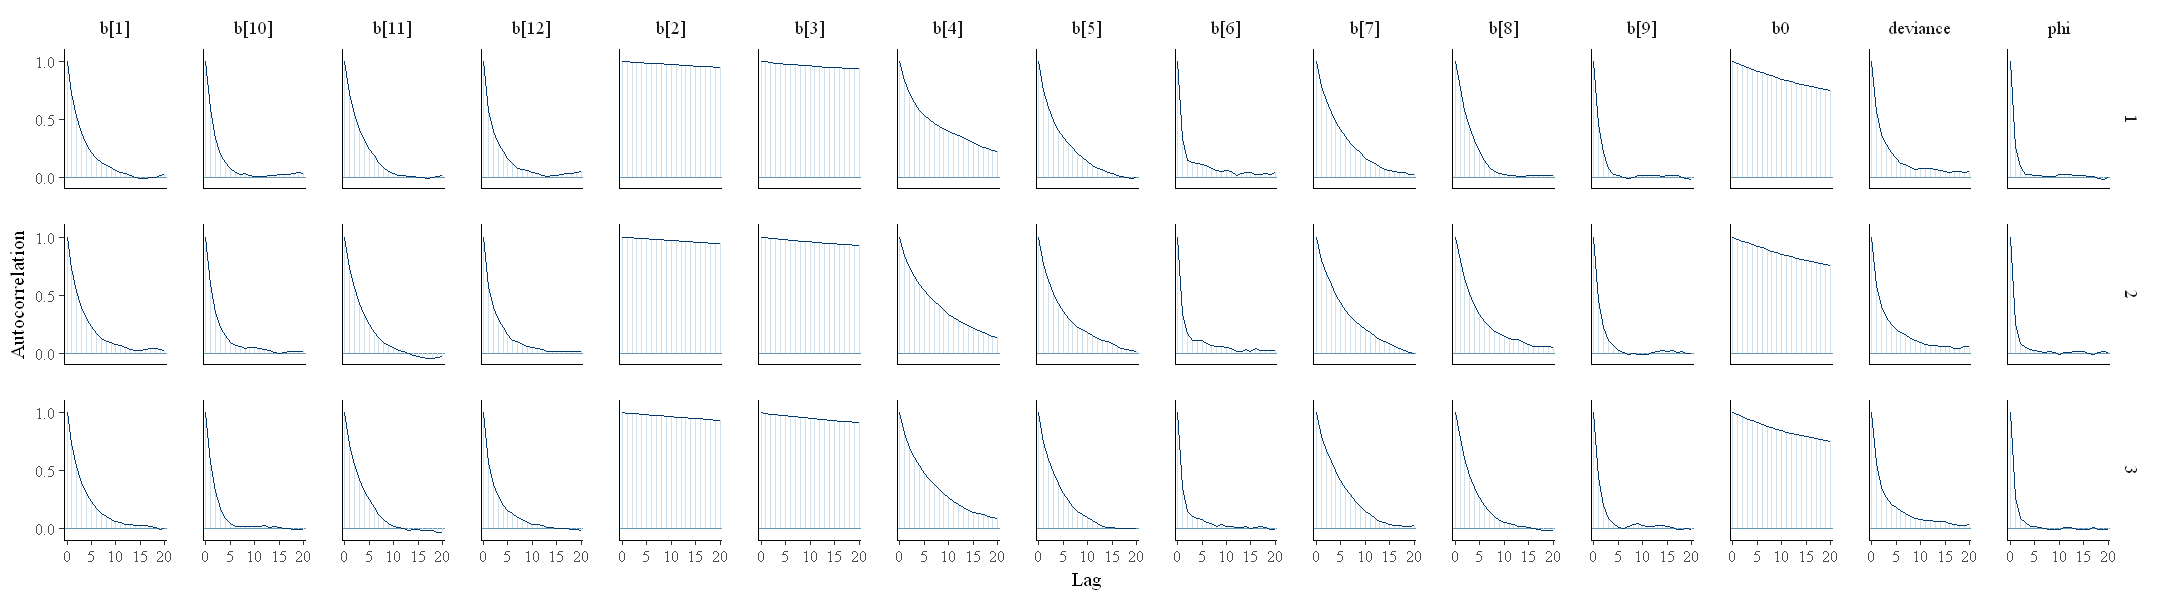

In [62]:
options(repr.plot.width=18,repr.plot.height=5)
mcmc_acf(Docvis.JAGS.NB03.mcmc)

# 05d - Bayesian negative binomial regression with JAGS 
## Likelihood entered with the _zeros trick_

In [63]:
#install.packages("R2jags",dependencies=TRUE,repos="https://cloud.r-project.org")
require(R2jags)

In [64]:
X <- model.matrix(Dvisits~.,data=Docvis)[,-1] # Discard the intercept column. We will enter b0
k<- ncol(X) # number of regression coefficients
n<-nrow(X)  # number of observations
str(X)
c(n,k)

 num [1:5190, 1:12] 1 1 0 0 0 1 1 1 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:5190] "1" "2" "3" "4" ...
  ..$ : chr [1:12] "Sex" "Age" "Agesq" "Income" ...


[1] 5190   12

In [65]:
Docvis.JAGS.NB04.data <- list(y = Docvis$Dvisits, X = X, k = k, n = n, Zeros = rep(0, n))

#### Likelihood (pdf) of a $\negbindist$

For each of the $n$ observations:

$$
    {\cal L}=f(y\,|\,\phi,\mu)
    =\dfrac{\Gamma(y+\theta)}{\Gamma(\theta)\cdot y!}\cdot 
    \left(\dfrac{\theta}{\mu+\theta}\right)^{\theta}\cdot\left(\dfrac{\mu}{\mu+\theta}\right)^{y}
    =\dfrac{\Gamma(y+1/\phi)}{\Gamma(1/\phi)\cdot y!}\cdot 
    \left(\dfrac{1/\phi}{\mu+1/\phi}\right)^{1/\phi}\cdot\left(\dfrac{\mu}{\mu+1/\phi}\right)^{y},
    \mskip30mu \mu,\theta>0,\mskip30mu y=0,1,2,\dots
$$

 
$$
    u=\dfrac{\theta}{\mu+\theta}=\dfrac{1/\phi}{\mu+1/\phi},\mskip50mu 
    1-u=\dfrac{\mu}{\mu+\theta}=\dfrac{\mu}{\mu+1/\phi}.
$$


We obtain $\ell=\log{\cal L}$ by adding $n$ terms like the one above.

In [67]:
cat("
model{
    # Priors for coefficients
    b0 ~ dnorm(0, 0.001)
    for (j in 1:k){
        b[j] ~ dnorm(0, 0.0001)
        }
    
    # Prior for phi
    numS ~ dnorm(0, 0.0016)
    denomS ~ dnorm(0, 1)
    phi <- abs(numS/denomS)                 # Above prior was a uniform. Why the change?
                                            # Actually a ratio of two normals is Cauchy


    C <- 10000                              # A very large constant

    for (i in 1:n) {

        # Log-likelihood function using zero trick:

        Zeros[i] ~ dpois(Zeros.mean[i])

        Zeros.mean[i] <- -L[i] + C

        l1[i] <- 1/phi * log(u[i])
        l2[i] <- y[i] * log(1 - u[i])
        l3[i] <- loggam(y[i] + 1/phi)
        l4[i] <- loggam(1/phi)
        l5[i] <- loggam(y[i] + 1)                      # (This term from factorial(y))
        L[i] <- l1[i] + l2[i] + l3[i] - l4[i] - l5[i]
        u[i] <- (1/phi) / (1/phi + mu[i])

        log(mu[i]) <- max(-20, min(20, eta[i]))
        eta[i] <- b0 + inprod(b[], X[i,])
        }

    }
    ",fill = TRUE,file="Docvis.JAGS.NB04.jag")

In [68]:
Docvis.JAGS.NB04.inits <- function(){
    list(b0 = rnorm(1, 0, 0.1), b = rnorm(k, 0, 0.1), 
    numS = rnorm(1, 0, 25), denomS = rnorm(1, 0, 1))
    }

In [69]:
Docvis.JAGS.NB04.parms <- c("b0", "b", "phi")

### Quite LOOONG computation

In [70]:
Docvis.JAGS.NB04.model <- jags(data = Docvis.JAGS.NB04.data,
            inits = Docvis.JAGS.NB04.inits,
            parameters = Docvis.JAGS.NB04.parms,
            model = "Docvis.JAGS.NB04.jag",
            n.thin = 1,
            n.chains = 3,
            n.burnin = 3000,
            n.iter = 10000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 5190
   Unobserved stochastic nodes: 15
   Total graph size: 141378

Initializing model



In [71]:
print(Docvis.JAGS.NB04.model, intervals=c(0.025, 0.975), digits=3)

Inference for Bugs model at "Docvis.JAGS.NB04.jag", fit using jags,
 3 chains, each with 10000 iterations (first 3000 discarded)
 n.sims = 21000 iterations saved
               mu.vect sd.vect          2.5%         97.5%  Rhat n.eff
b[1]             0.218   0.071         0.079         0.355 1.001  4300
b[2]            -0.645   1.256        -2.867         2.096 1.076   580
b[3]             1.076   1.378        -1.949         3.507 1.075   550
b[4]            -0.133   0.107        -0.345         0.071 1.004   750
b[5]             0.122   0.085        -0.043         0.288 1.002  1800
b[6]            -0.509   0.210        -0.931        -0.106 1.002  2500
b[7]             0.149   0.118        -0.076         0.384 1.002  2400
b[8]             0.215   0.025         0.167         0.264 1.002  1300
b[9]             0.145   0.008         0.130         0.160 1.001  7600
b[10]            0.038   0.014         0.011         0.065 1.001 21000
b[11]            0.101   0.079        -0.054         0.25

In [72]:
Docvis.JAGS.NB04.mcmc<-as.mcmc(Docvis.JAGS.NB04.model)

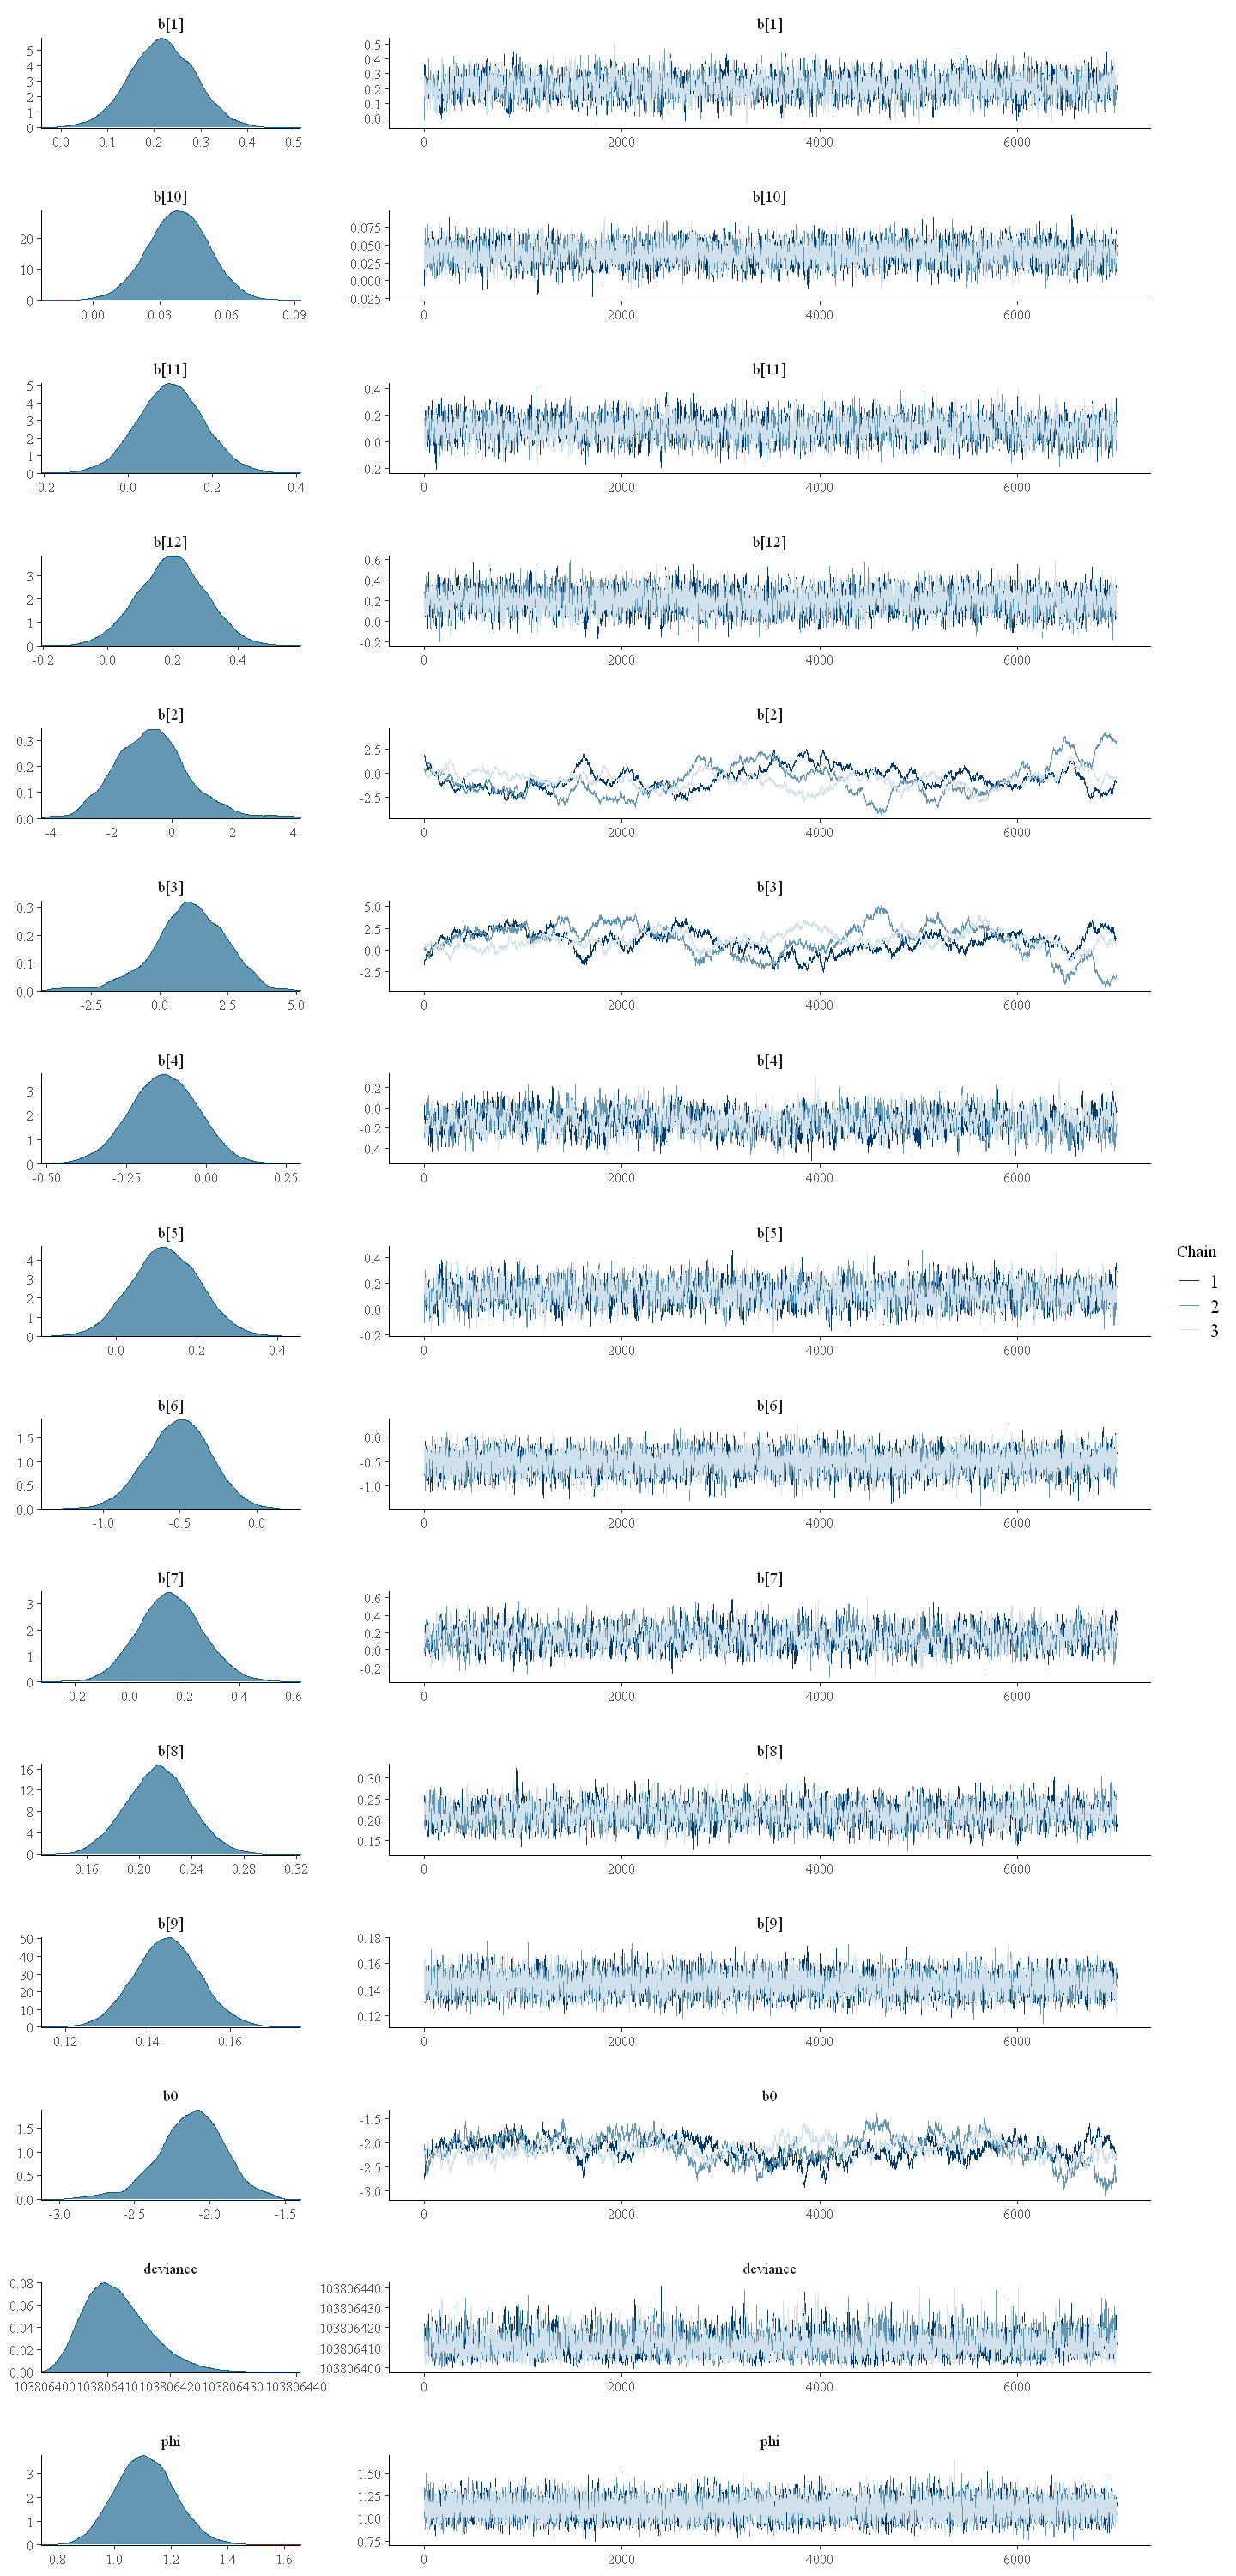

In [73]:
options(repr.plot.width=12,repr.plot.height=25)
mcmc_combo(Docvis.JAGS.NB04.mcmc,widths=c(1,3))

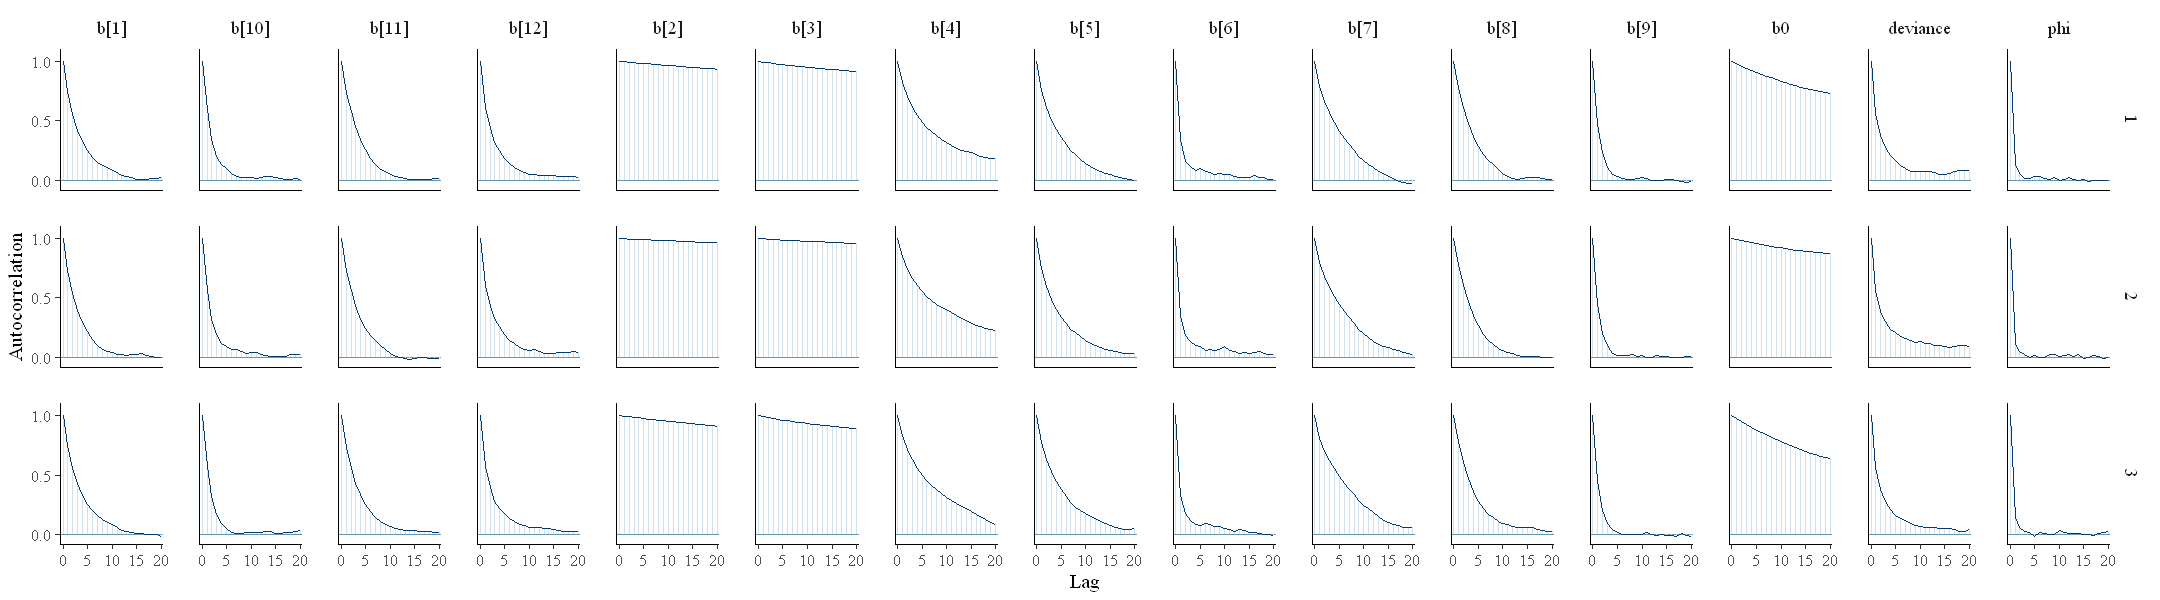

In [74]:
options(repr.plot.width=18,repr.plot.height=5)
mcmc_acf(Docvis.JAGS.NB04.mcmc)

# 05e - Bayesian negative binomial regression with JAGS, 
## Alternative parameterization
## Likelihood entered with the _zeros trick_

In [ ]:
#install.packages("R2jags",dependencies=TRUE,repos="https://cloud.r-project.org")
require(R2jags)

In [ ]:
X <- model.matrix(Dvisits~.,data=Docvis)[,-1] # Discard the intercept column. We will enter b0
k<- ncol(X) # number of regression coefficients
n<-nrow(X)  # number of observations
str(X)
c(n,k)

In [ ]:
Docvis.JAGS.NB05.data <- list(y = Docvis$Dvisits, X = X, k = k, n = n, Zeros = rep(0, n))

#### Likelihood (pdf) of a $\negbindist$

For each of the $n$ observations:

$$
    f(y\,|\,\phi,\mu)
    =\dfrac{\Gamma(y+\theta)}{\Gamma(\theta)\cdot y!}\cdot 
    \left(\dfrac{\theta}{\mu+\theta}\right)^{\theta}\cdot\left(\dfrac{\mu}{\mu+\theta}\right)^{y}
    =\dfrac{\Gamma(y+1/\phi)}{\Gamma(1/\phi)\cdot y!}\cdot 
    \left(\dfrac{1/\phi}{\mu+1/\phi}\right)^{1/\phi}\cdot\left(\dfrac{\mu}{\mu+1/\phi}\right)^{y},
    \mskip30mu \mu,\theta>0,\mskip30mu y=0,1,2,\dots
$$

 
$$
    u=\dfrac{\theta}{\mu+\theta}=\dfrac{1/\phi}{\mu+1/\phi},\mskip50mu 
    1-u=\dfrac{\mu}{\mu+\theta}=\dfrac{\mu}{\mu+1/\phi}.
$$

In [ ]:
cat("
model{
    # Priors for coefficients
    b0 ~ dnorm(0, 0.001)
    for (j in 1:k){
        b[j] ~ dnorm(0, 0.0001)
        }
    
    # Prior for phi
    numS ~ dnorm(0, 0.0016)
    denomS ~ dnorm(0, 1)
    theta <- abs(numS / denomS)

    C <- 10000                              # A "very large" constant
    
    for (i in 1:n {

        # Log-likelihood function using zero trick:
        Zeros[i] ~ dpois(Zeros.mean[i])
        Zeros.mean[i] <- -L[i] + C

        l1[i] <- theta * log(u[i])
        l2[i] <- Y[i] * log(1 - u[i])
        l3[i] <- loggam(Y[i] + theta)
        l4[i] <- loggam(theta)
        l5[i] <- loggam(Y[i] + 1)
        L[i] <- l1[i] + l2[i] + l3[i] - l4[i] - l5[i]

        u[i] <- theta / (theta + mu[i])
        log(mu[i]) <- max(-20, min(20, eta[i]))
        eta[i] <- b0 + inprod(b[], X[i,])
        }
    }
    ",fill = TRUE,file="Docvis.JAGS.NB05.ag")

In [ ]:
Docvis.JAGS.NB05.inits <- function(){
    list(b0 = rnorm(1, 0, 0.1), b = rnorm(k, 0, 0.1), 
    numS = rnorm(1, 0, 25), denomS = rnorm(1, 0, 1))
    }

In [ ]:
Docvis.JAGS.NB05.parms <- c("b0", "b", "phi")

In [ ]:
print(Docvis.JAGS.NB05.model, intervals=c(0.025, 0.975), digits=3)